# House Prices - Regression Predictions YData 2024    

**Team: Random Forest Rangers** ([Dmitry Gufranov](https://www.linkedin.com/in/gufranov/), [Evgenia Amineva](https://www.linkedin.com/in/janeami/), [Valeriya Vazhnova](https://www.linkedin.com/in/gufranov/))

## Part 1. EDA

The EDA below answers the following questions:

* [Which 3 features have the highest number of missing values](#first_q)
* [How the price behave over the years?](#second_q)
* [Plot the the feature distribution using histograms](#third_q)
* [Compute and order the features by their correlation with label](#fourth_q)
* [Add more EDA that will help you understand the data and support your modeling decisions](#fifth_q)

### Import libraries

In [94]:
import pandas as pd 
import numpy as np 
import datetime

# vizualisation
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# ml
from lightgbm import LGBMRegressor
import catboost as cb
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

### Loading the data

In [3]:
# load the train data
df = pd.read_csv('train.csv')
display(df.head())
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [4]:
# get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
# check empty columns
print("Number of empty columns:", df.isnull().all().sum(), "\n")

# check duplicates
print("Number of duplicates (Id column is disregarded):", df.drop(columns=['Id']).duplicated().sum(), "\n")

# check uniqueness of Id
print("All Ids are unique:", df['Id'].is_unique)

Number of empty columns: 0 

Number of duplicates (Id column is disregarded): 0 

All Ids are unique: True


### 1.1 3 features with the highest number of missing values <a class="anchor" id="first_q"></a>

In [9]:
# Percentage of missing values
missing_val = df.isnull().sum()
missing_val = missing_val[missing_val > 0] / df.shape[0] *100
missing_val.sort_values(ascending=False, inplace=True)

print("Percantage of missing values by columns: \n\n",missing_val)

Percantage of missing values by columns: 

 PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [10]:
# number of missing values among the 3 features with the most missing values
df.isnull().sum().sort_values(ascending=False)[:3]

PoolQC         1453
MiscFeature    1406
Alley          1369
dtype: int64

Let's look at the information about the features with the highest number of missing values in the data description file

<b>PoolQC</b>: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

<b>MiscFeature</b>: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

<b>Alley</b>: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

It appears that NA value has a meaning according to the data description file. Let's take a closer look at the values in these columns:

In [11]:
for c in ['PoolQC', 'MiscFeature', 'Alley']:
    print(df[c].value_counts(), '\n')

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64 

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64 

Alley
Grvl    50
Pave    41
Name: count, dtype: int64 



Since 'NA' doesn't appear as a separate value in the columns above, for the columns 'PoolQC' and 'Alley' we can consider it as significant information meaning 'No Pool' and 'No alley access' respectfully. It may be useful for our main goal and later we will need to fill them with 'NA' label.

Also, information about the Pool should match between the columns 'PoolQC' and 'PoolArea', let's check it:

In [12]:
df[df['PoolArea']!=0]['PoolArea'].count() == df[~df['PoolQC'].isna()]['PoolQC'].count()

True

### 1.2 Price behavior over the years <a class="anchor" id="second_q"></a>

To evaluate the price behavior over the years we will create four plots:

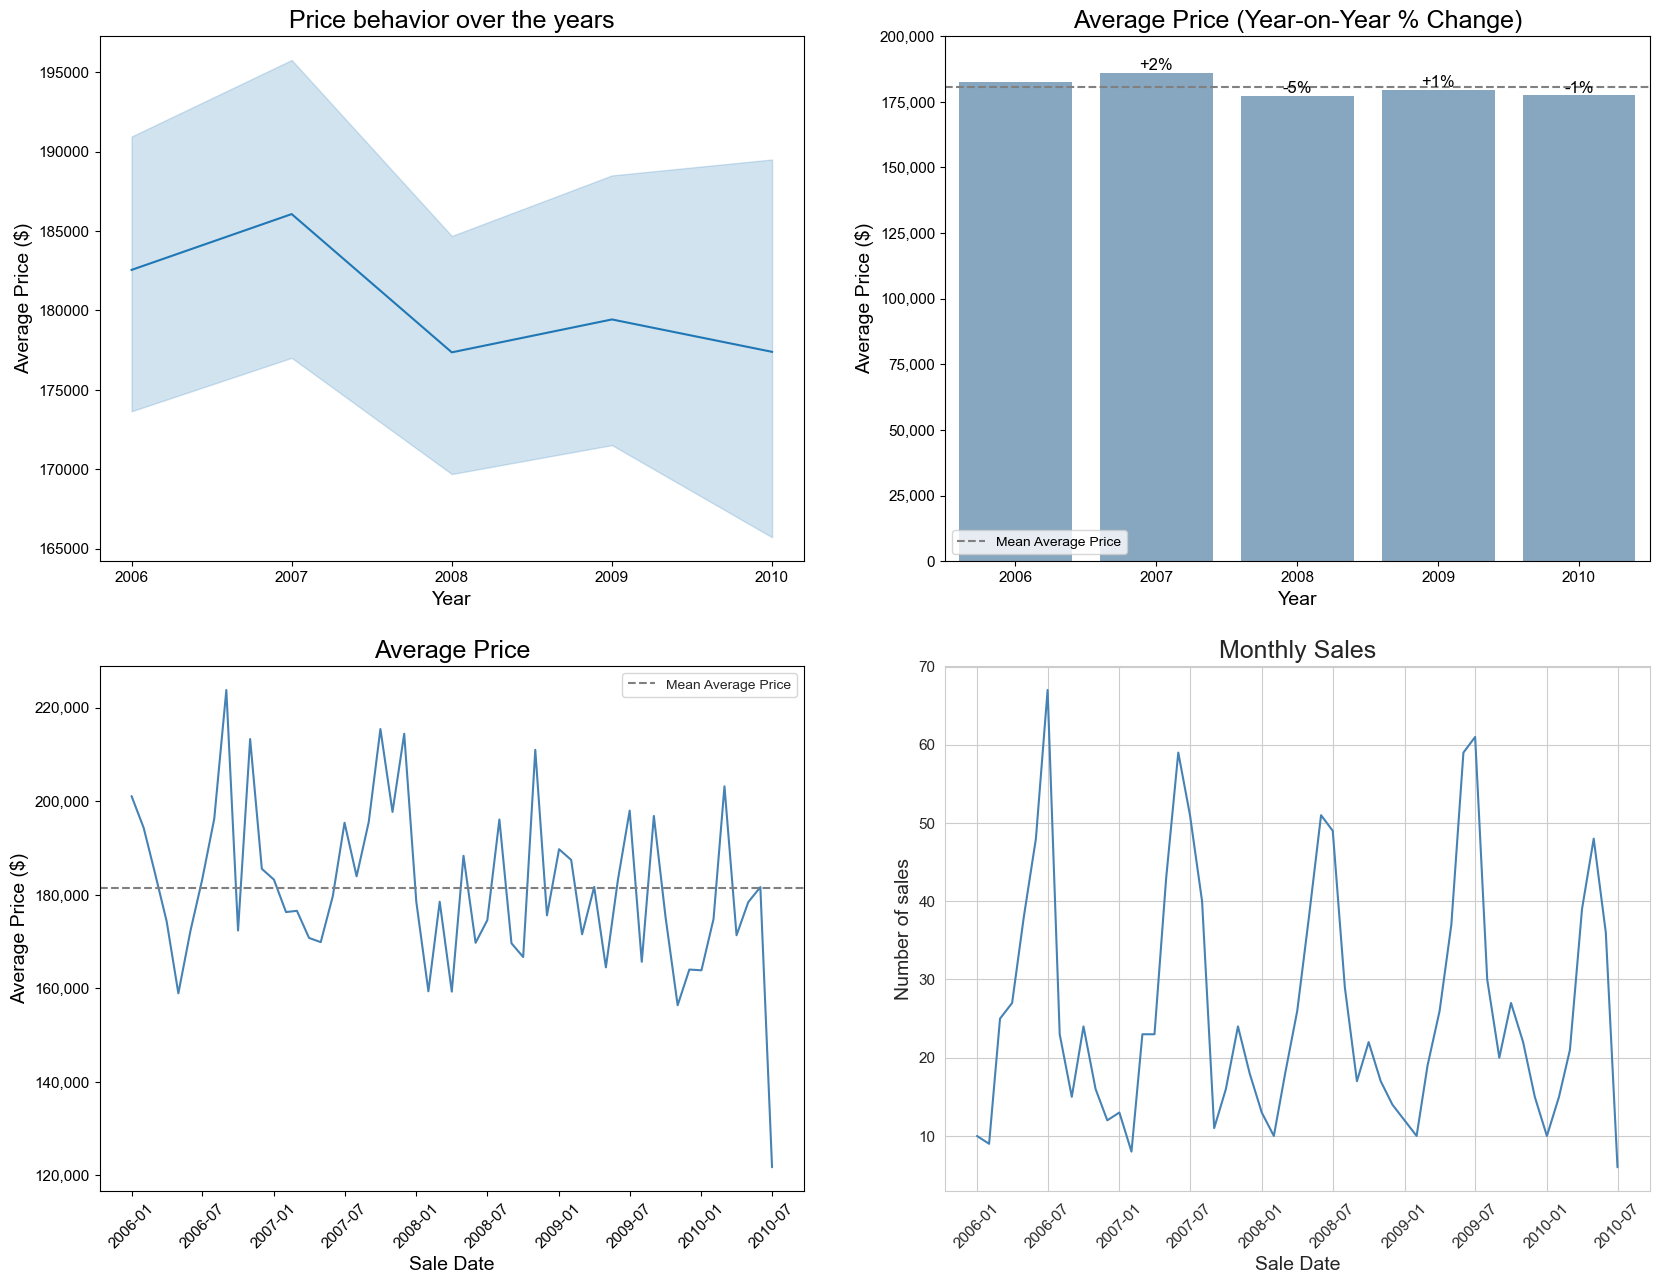

In [13]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)

sns.lineplot(df, x = 'YrSold', y='SalePrice')

plt.xticks(df['YrSold'].unique(), fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Price behavior over the years', fontsize=18)


plt.subplot(2, 2, 2)

# how did price behave over the years

df_dt = df.copy()

year_price = df_dt.groupby('YrSold')['SalePrice'].mean().to_frame('AvgPrice')
year_price['YearOnYearChange'] = year_price['AvgPrice'].pct_change()
year_price['ChangeLabel'] = year_price['YearOnYearChange'].map(lambda x: 
                                                               f'+{x :.0%}' if x > 0 else f'{x :.0%}')

# Create the plot
sns.barplot(data=year_price, x=year_price.index, y='AvgPrice', color='steelblue', alpha=0.7)
plt.axhline(y=year_price['AvgPrice'].mean(), linestyle='--', color='grey', label='Mean Average Price')

for i, label in enumerate(year_price['ChangeLabel'][1:], start=1):
    plt.text(i, year_price['AvgPrice'].iloc[i], label, ha='center', va='bottom', fontsize=12)

plt.title('Average Price (Year-on-Year % Change)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.ylim(0, 200000)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(loc='lower left')
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

plt.subplot(2, 2, 3)

# combining month and year
df_dt['SaleDate'] = df_dt.apply(lambda x: datetime.date(x['YrSold'], x['MoSold'], 1), axis=1)

# how did the price behave over the months
month_price = df_dt.groupby('SaleDate')['SalePrice'].mean().to_frame('AvgPrice')

sns.set_style("whitegrid")

sns.lineplot(data=month_price, x=month_price.index, y='AvgPrice', color='steelblue')
plt.axhline(y=month_price['AvgPrice'].mean(), linestyle='--', color='grey', label='Mean Average Price')

plt.title('Average Price', fontsize=18)
plt.xlabel('Sale Date', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(fontsize=11, rotation=45)
plt.yticks(fontsize=11)
plt.legend()

plt.subplot(2, 2, 4)

month_sale = df_dt.groupby('SaleDate').size().to_frame('Sales')

sns.lineplot(data=month_sale, x=month_sale.index, y='Sales', color='steelblue')
plt.title('Monthly Sales', fontsize=18)
plt.xlabel('Sale Date', fontsize=14)
plt.ylabel('Number of sales', fontsize=14)
plt.xticks(fontsize=11, rotation=45)
plt.yticks(fontsize=11)
plt.show();


Our data covers the span of 5 years (2006-2010). Over that time average prices were pretty stable, centered around $180K, with with year-on-year variations under 5%.

Sale Price fluctuates heavily from month to month. We can also notice some seasonality: at the beginning of each year (approx. until May) average prices decline, they reach their peak height in September–November, but usually drop again by December. 

But it's more interesting to check the seasonality by the number of sales, where the trend is the opposite: autumn has a significant drop in housing sales, so each observation gains more weight (and thus raises the average price). Peak sales are always in June-July (possibly before the beginning of the school year).

### 1.3 Features distribution <a class="anchor" id="third_q"></a>

In [14]:
# convert categorical features to numerical

df_cat = df.copy()
# get dtypes in columns
c_dtype = df.dtypes
# we need to convert our categorical feature to numerical
for c in c_dtype[c_dtype=='object'].index:
    df_cat[c] = df_cat[c].astype('category').cat.codes

<Figure size 640x480 with 0 Axes>

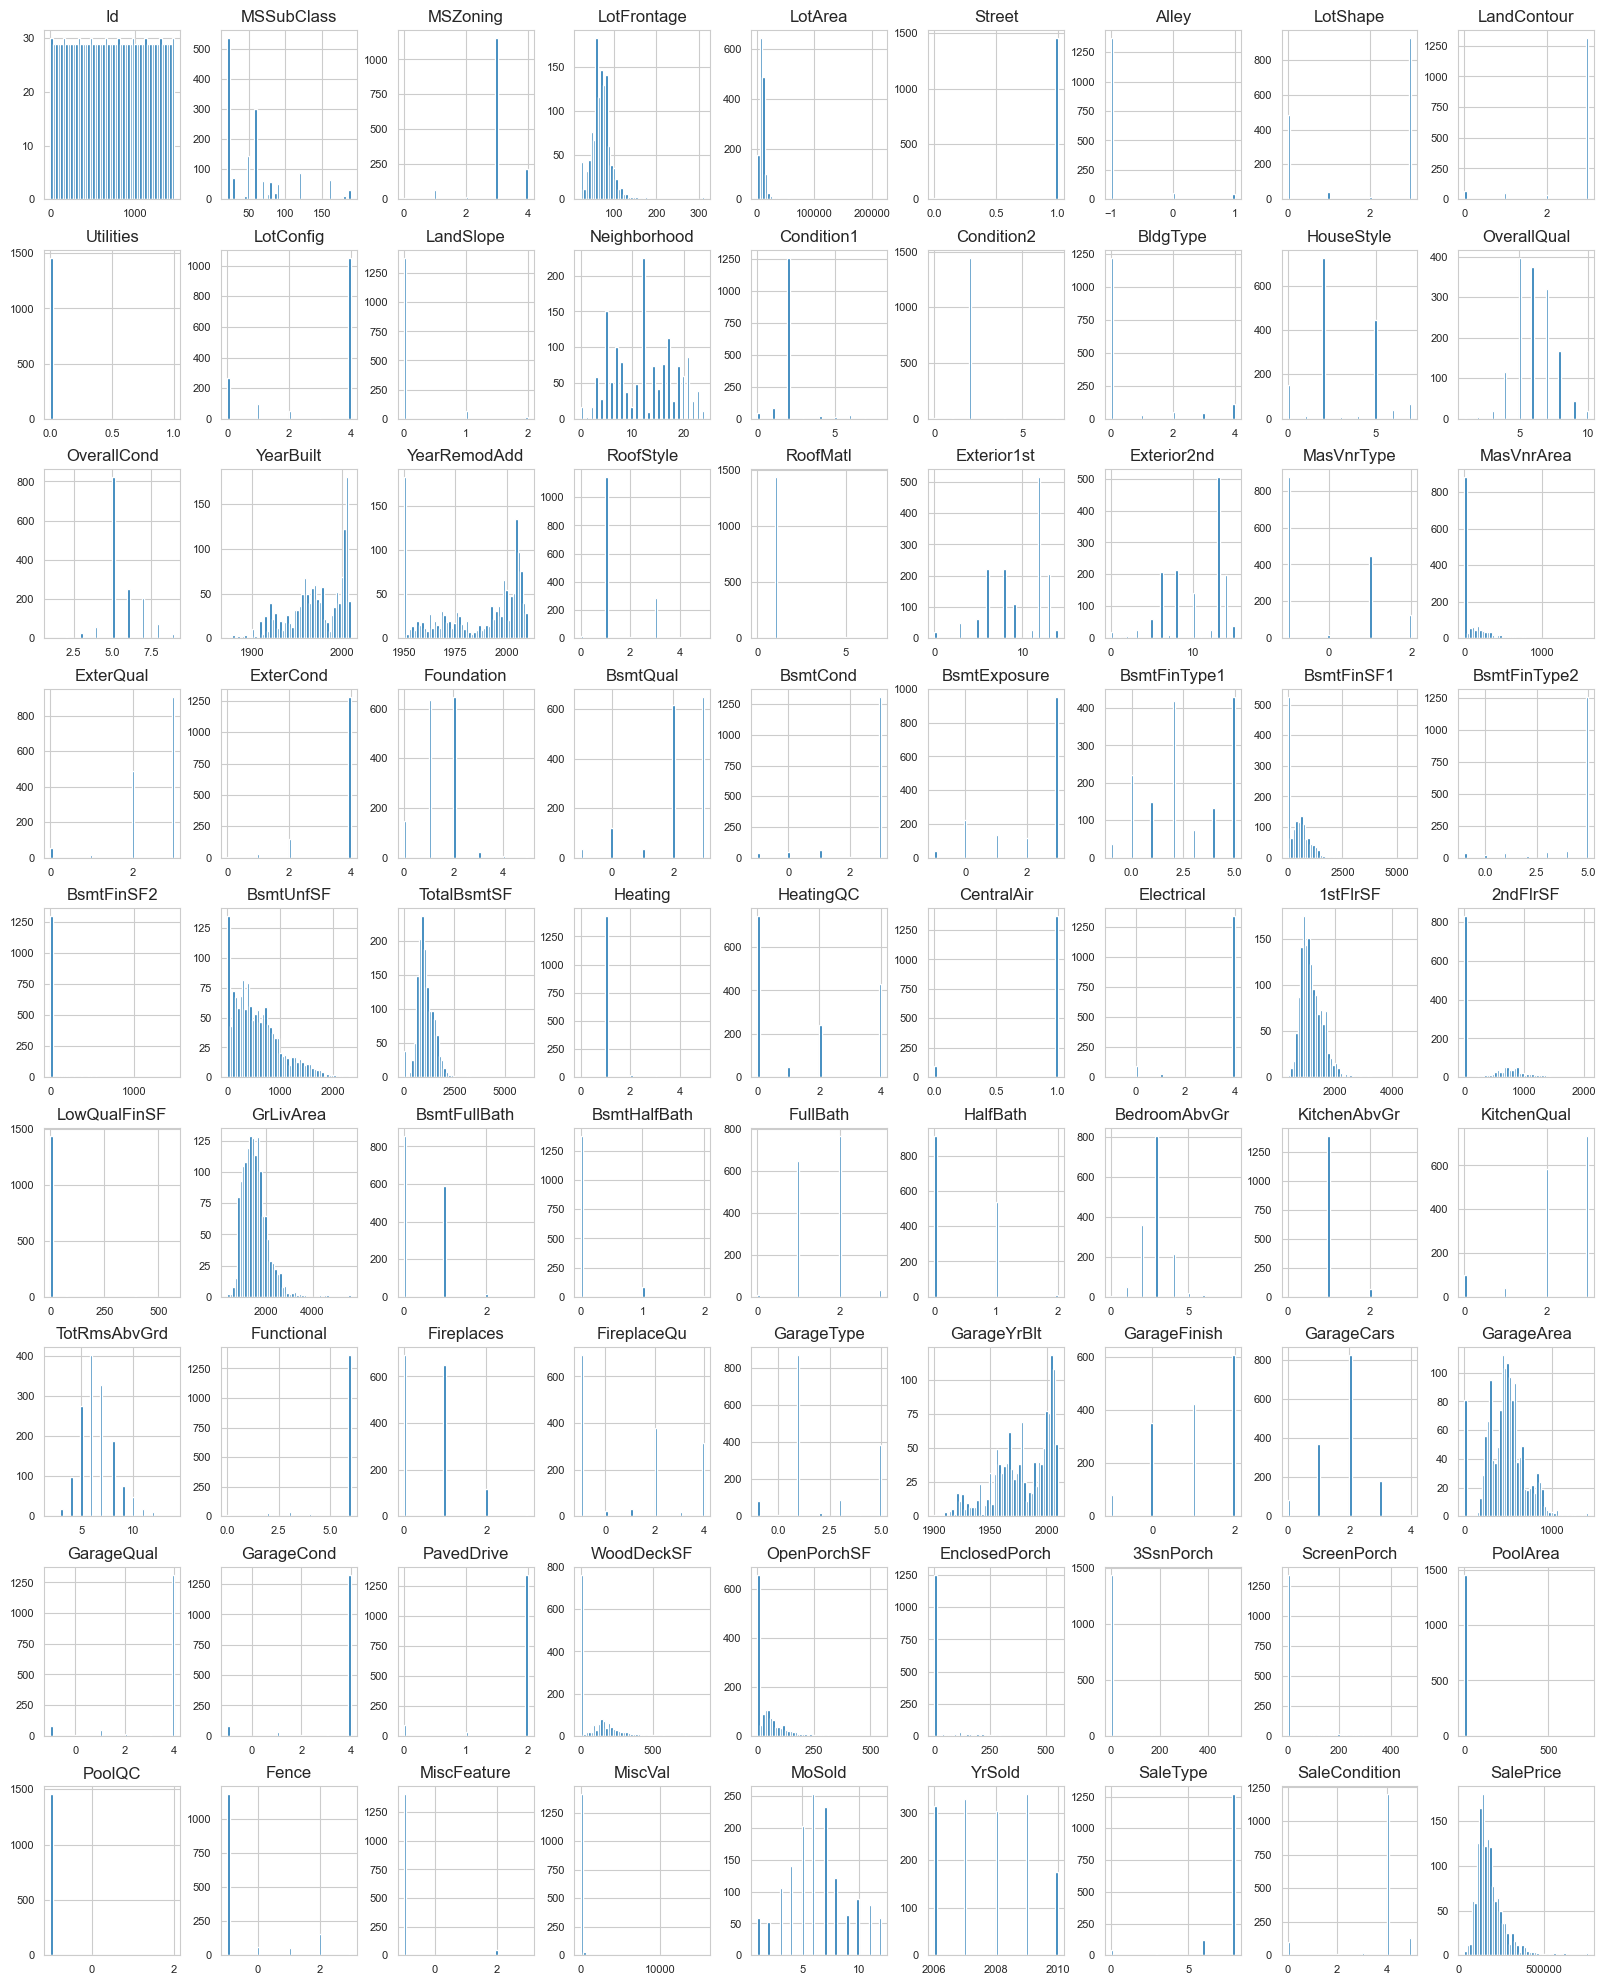

In [15]:
# features distribution
plt.figure()

df_cat.hist(figsize=(20, 25), bins=50, xlabelsize=8, ylabelsize=8)

plt.show()

We can observe that many numerical data are skewed, hence they will require normalization if we apply ML algorithms that assume normality.

Let's look more closely at the label distribution:

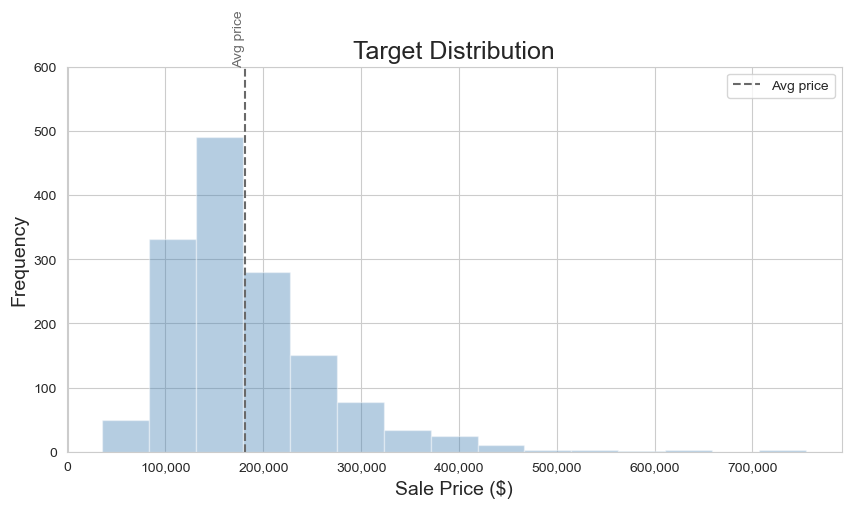

In [17]:
# overall distribution

plt.figure(figsize=(10, 5))
sns.distplot(df['SalePrice'], bins=15, color='steelblue', kde=False)
plt.axvline(x=df['SalePrice'].mean(), linestyle='--', color='dimgrey', label='Avg price')
plt.text(df['SalePrice'].mean(), 600, 'Avg price', rotation=90, va='bottom', ha='right', color='dimgrey')
plt.title('Target Distribution', fontsize=18)
plt.xlabel('Sale Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.ylim(0, 600)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.show();

In [18]:
display(df['SalePrice'].describe())
print(f'95th percentile: {np.percentile(df["SalePrice"], 95) :,.0f}')
print(f'Skewness: {df["SalePrice"].skew() :,.2f}')
print(f'Kurtosis: {df["SalePrice"].kurtosis() :,.2f}')

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

95th percentile: 326,100
Skewness: 1.88
Kurtosis: 6.54


While overall our target (Sale Price) is distributed normally, its distribution is heavily skewed to the right with very high prices as outliers. We can see it from the high skewness coefficient (>1), high positive kurtosis indicating heavy tails, as well as the histogram itself.

### 1.4 Features correlation with the label <a class="anchor" id="fourth_q"></a>

In [19]:
# calculate correlation index with the label using spearman methon, 
# since we can assume that it's possible to have nonlinear correlation among the features
corr_feats = df_cat.corr(method='spearman')['SalePrice'].sort_values(ascending=False)
h_corr_feats = corr_feats[abs(corr_feats) >= 0.5]
h_corr_feats

SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
TotRmsAbvGrd    0.532586
Fireplaces      0.519247
KitchenQual    -0.569857
ExterQual      -0.633315
Name: SalePrice, dtype: float64

The highest correlation index with the label have OverallQual and GrLivArea. Let's look at them:

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

GrLivArea: Above grade (ground) living area square feet

### 1.5 More EDA <a class="anchor" id="fifth_q"></a>

#### Missing values

Let's explore more columns with missing values and try to understand how we should deal with them.

Total number of features with missing values in the training data set: 19


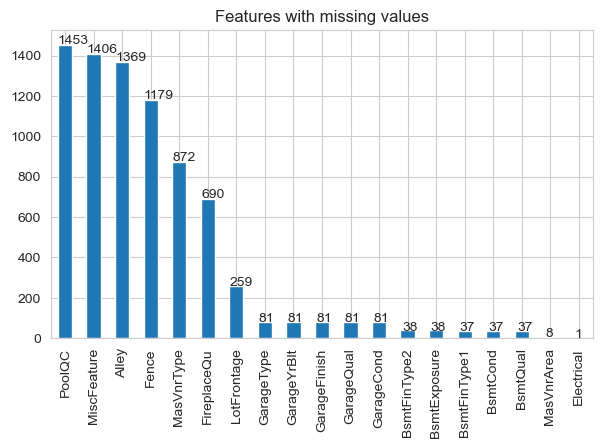

In [20]:
plt.figure(figsize=(7,4))
sns.set_style("whitegrid")
missing_val = df.isnull().sum()
missing_val = missing_val[missing_val > 0]
print("Total number of features with missing values in the training data set:", len(missing_val))
missing_val.sort_values(ascending=False, inplace=True)
ax = missing_val.plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Features with missing values")
plt.show()

Obtain information from the data description file:

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone


FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

LotFrontage: Linear feet of street connected to property

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

MasVnrArea: Masonry veneer area in square feet

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

Similar as we discovered in 1.1 None value has a meaning to the next features: 'Fence', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'. And it makes sense that the feature 'GarageYrBlt' has the same amount of missing values as other features about a Garage since there isn't a garage in these houses.

It's necessary to understand how to deal with missing values in the next features: LotFrontage, MasVnrArea, and Electrical.

At that point,  we will create a list of features where None value has a meaning.

In [21]:
feat_wn = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual']

#### Features correlation

It would be useful to investigate more about the features correllation.

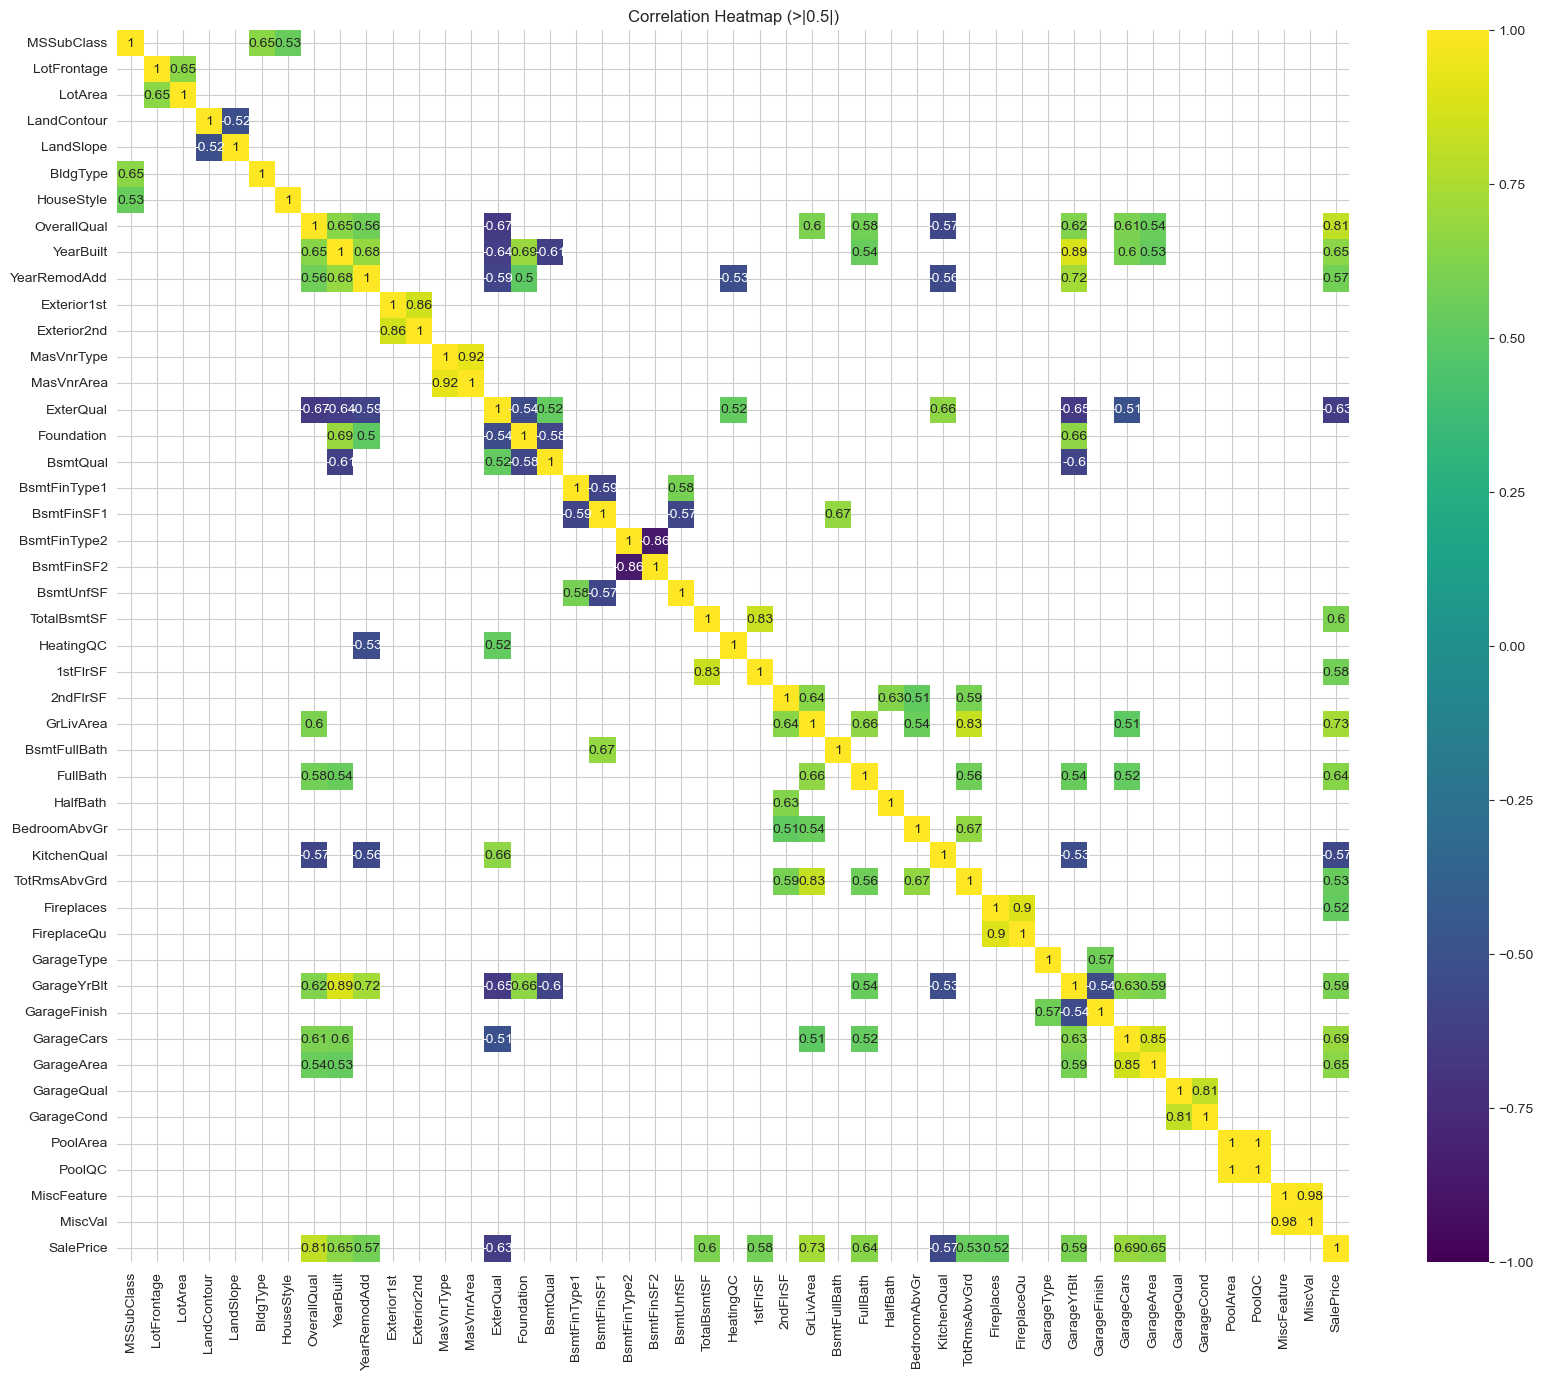

In [22]:
#calculate correlation matrix
corr = df_cat.corr(method='spearman')

# leave only features that have correration index with others > 0.5
mask = (abs(corr) > 0.5)
corr_s = corr[mask].sum()

# remove others features from the heatmap
corr.drop(corr_s[corr_s==1].index, inplace=True)
corr.drop(corr_s[corr_s==1].index, axis=1, inplace=True)

# Plotting the heatmap using Matplotlib and Seaborn
plt.figure(figsize=(20, 16))
#sns.heatmap(corr_matrix[mask], vmin=-0.8, vmax=0.8, square=True, annot=True, cmap='viridis')
sns.heatmap(corr[mask], vmin=-1, vmax=1, square=True, annot=True, cmap='viridis')

# Customize the plot
plt.title("Correlation Heatmap (>|0.5|)")
plt.show()

The plot above revealed, that some features have robust correlations, for instance, 'Fireplaces' and 'FireplaceQy', 'MiscFeature' and 'MiscVal'. We need to keep it in mind because it suggests potential multicollinearity, which can be problematic for certain types of regression models since it can affect the stability of the coefficient estimates.

#### Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

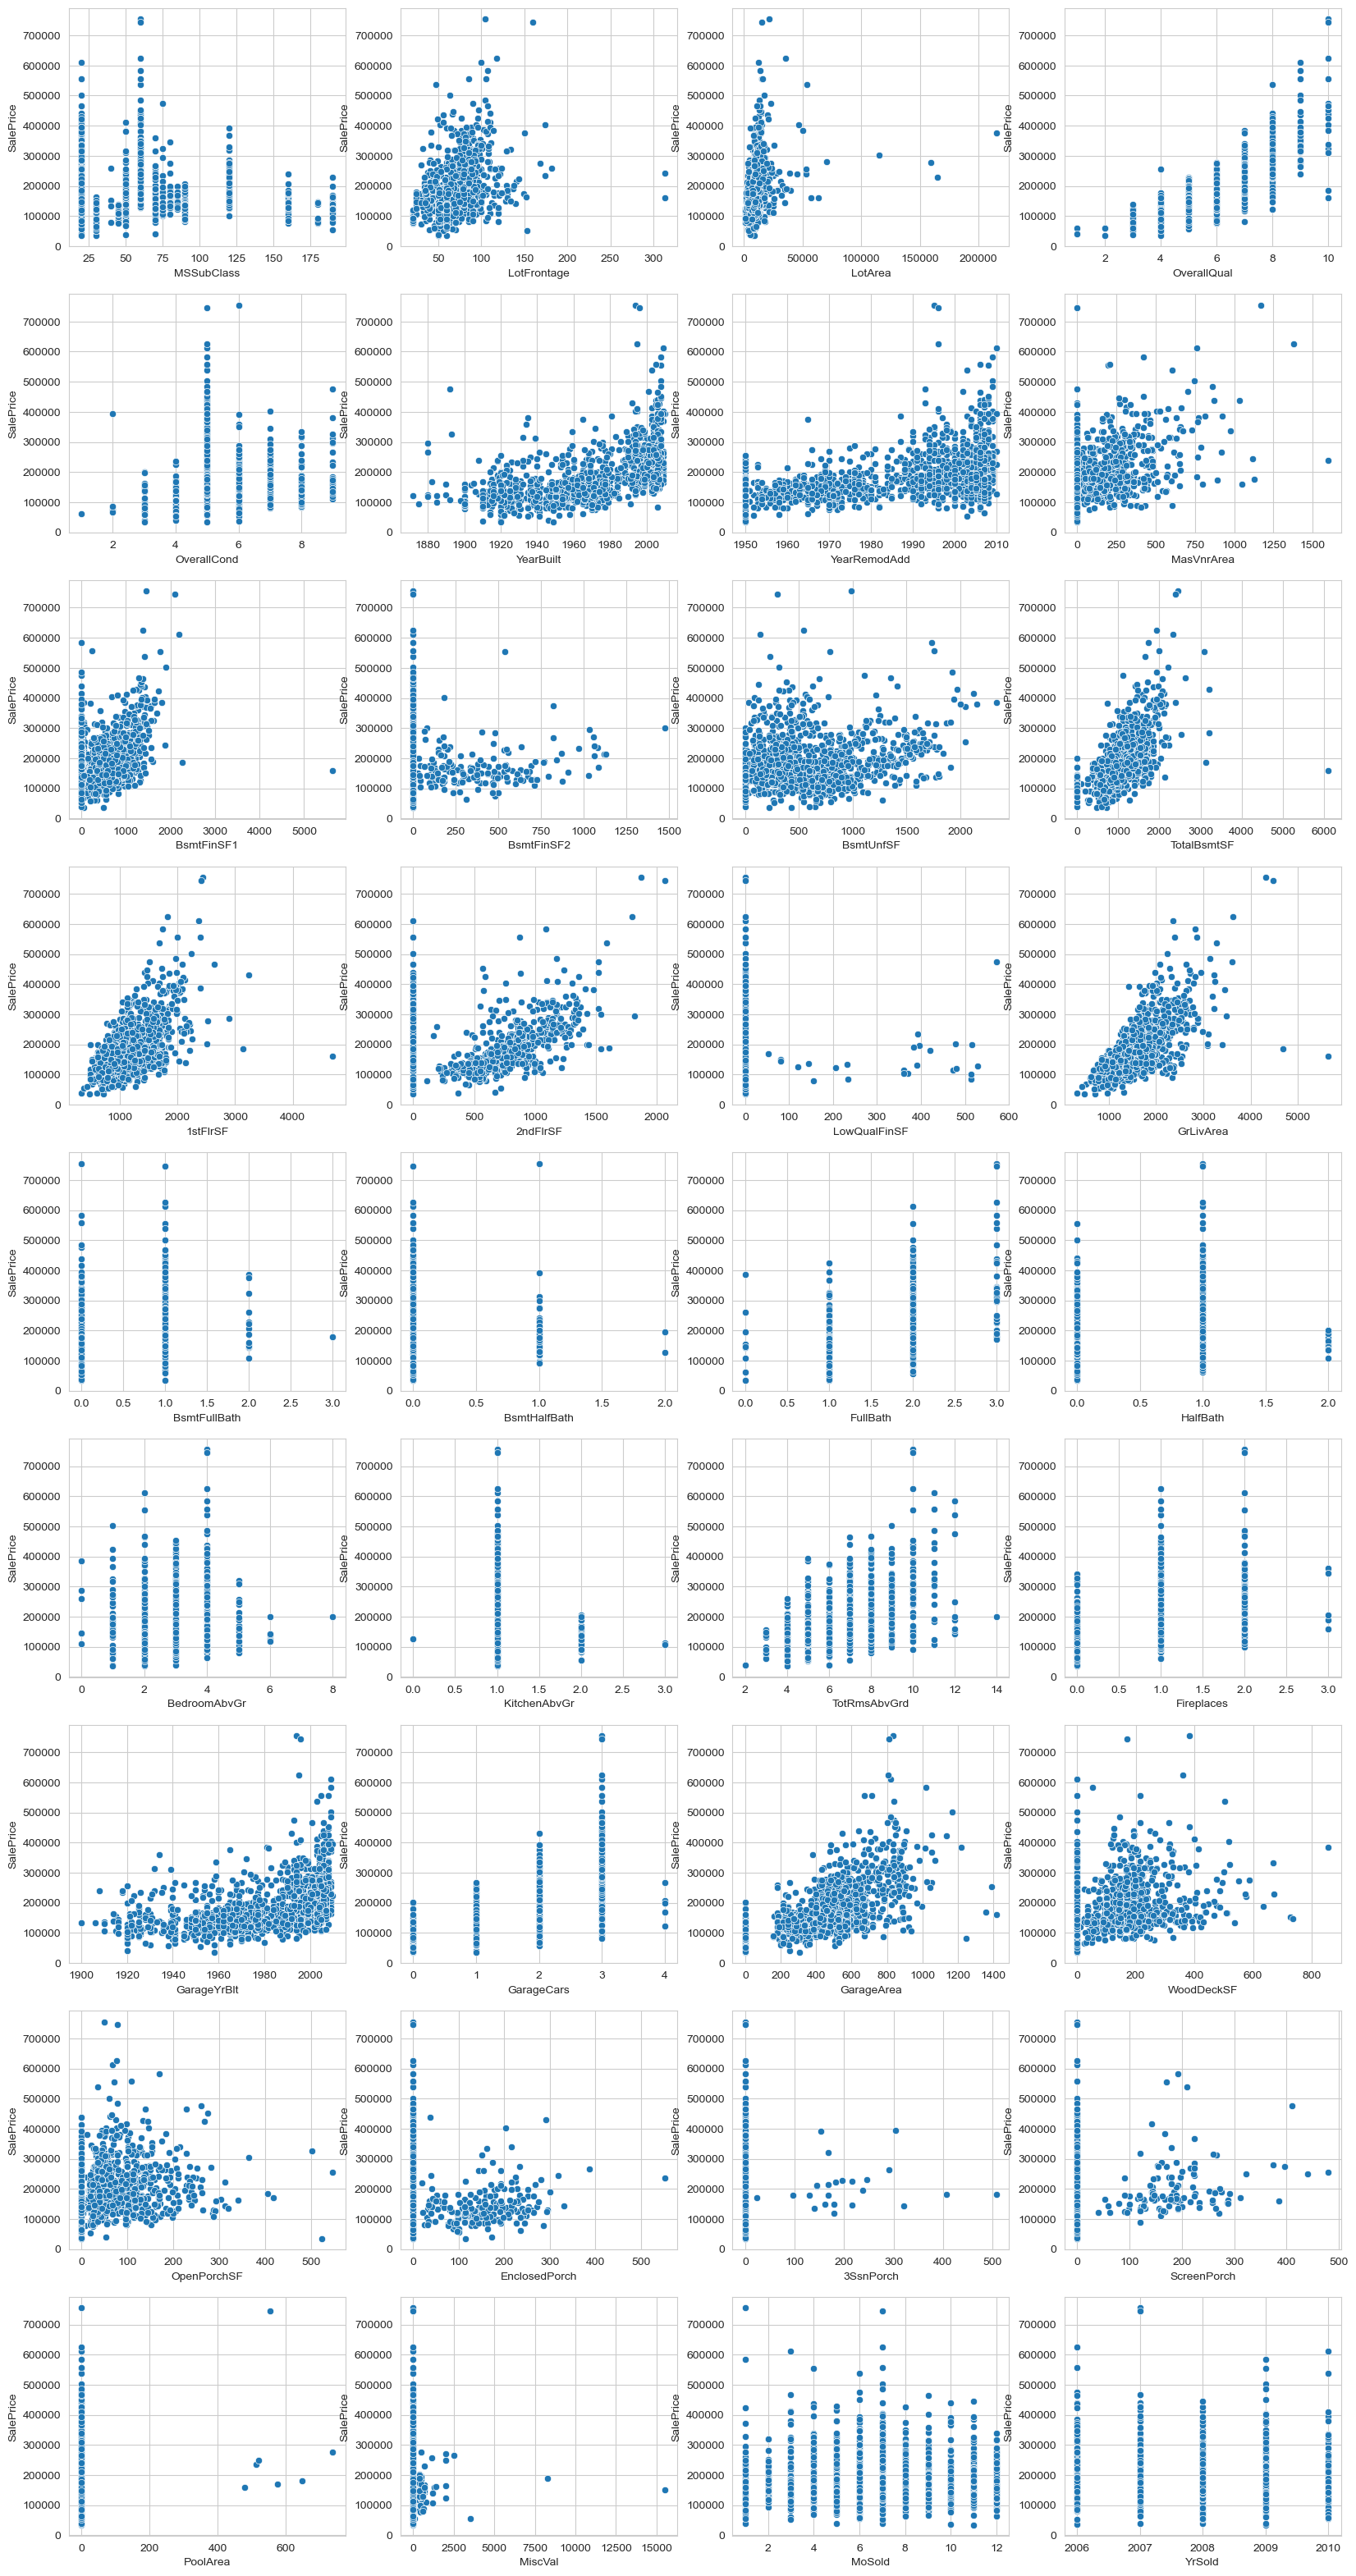

In [23]:
# create a list of numerical columns (excluding Id and SalePrice)
num_col_woid = df.dtypes[df.dtypes != 'object'].index[1:-1]

# create scatterplots to find the outliers
plt.figure(figsize=(20, 40))
i = 1
for nf in num_col_woid:
    plt.subplot(9, 4, i)
    sns.scatterplot(df, x=nf, y='SalePrice')
    i += 1
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

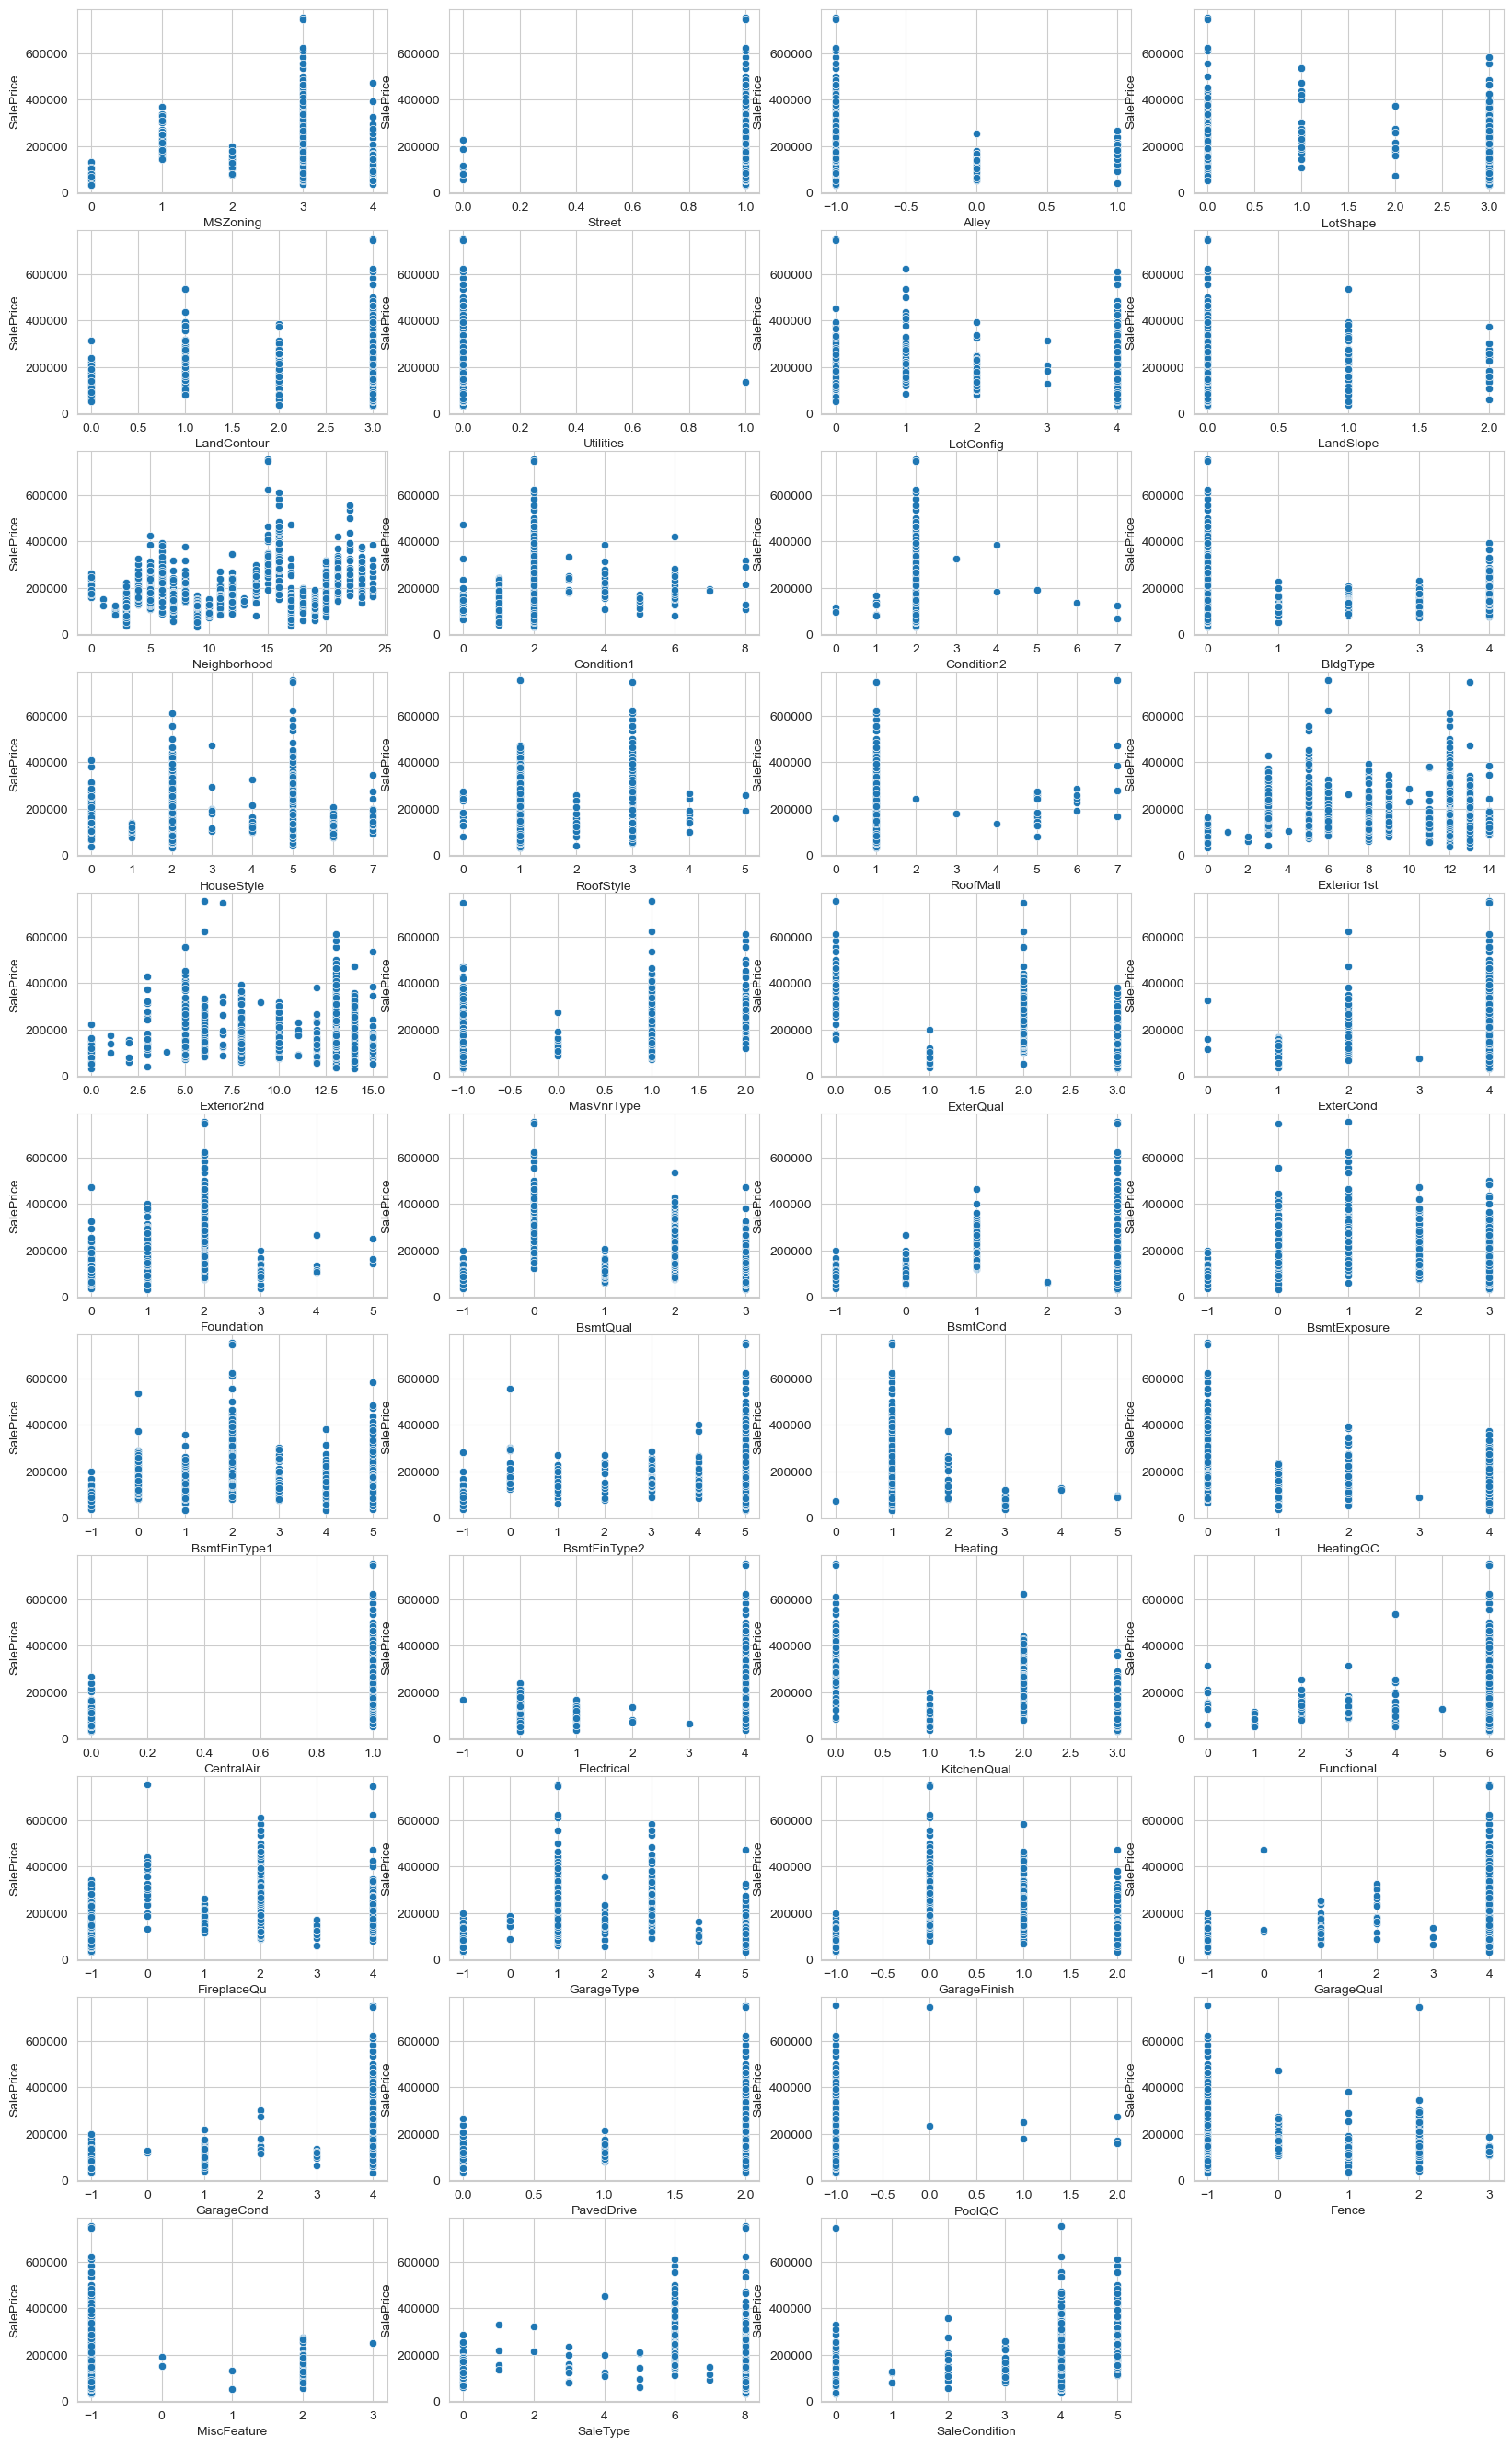

In [24]:
# create a list of numerical columns (excluding Id and SalePrice)
cat_cols = df.dtypes[df.dtypes == 'object']
tdf = df.copy()


# we need to convert our categorical feature to numerical
for c in cat_cols.index:
    tdf[c]= tdf[c].astype('category').cat.codes

# create scatterplots to find the outliers
plt.figure(figsize=(20, 40))
i = 1
for nf in cat_cols.index:
    plt.subplot(13, 4, i)
    sns.scatterplot(tdf, x=nf, y='SalePrice')
    i += 1
plt.show

Let's look at boxplots for each categorical feature to decide about encoding

1. MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

This feature is categorical, so we need to add it to the list with categorical features

In [26]:
# BedroomAbvGr
# KitchenAbvGr
# KitchenQual
# TotRmsAbvGrd

corr_feats = tdf[['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SalePrice']].corr(method='spearman')['SalePrice']#.sort_values(ascending=False) # ['SalePrice']
h_corr_feats = corr_feats
h_corr_feats

BedroomAbvGr    0.234907
KitchenAbvGr   -0.164826
TotRmsAbvGrd    0.532586
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [27]:
corr_feats = tdf[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'SalePrice']].corr(method='spearman')['SalePrice']#.sort_values(ascending=False) # ['SalePrice']
h_corr_feats = corr_feats
h_corr_feats

BsmtFullBath    0.225125
BsmtHalfBath   -0.012189
FullBath        0.635957
HalfBath        0.343008
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [28]:
tdf['Bath'] = tdf['BsmtFullBath'] + 0.5* tdf['BsmtHalfBath'] + tdf['FullBath'] + 0.5*tdf['HalfBath']

In [ ]:
corr_feats = df[['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'SalePrice']].corr(method='spearman')['SalePrice']#.sort_values(ascending=False) # ['SalePrice']
h_corr_feats = corr_feats
h_corr_feats
#df[['1stFlrSF', '2ndFlrSF', 'GrLivArea']]

## Part 2. Baseline

To establish a baseline we will build a simple Linear Regression model. 

To do so we will select features with the highest absolute value of the correlation coefficient, handle missing values among them, scale values and, eliminate features with high correlation coefficient between each other to avoid multicollinearity.

In [30]:
# check missing values
df[h_corr_feats.index].isna().sum()

BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64

In [31]:
# check if there is strong correlation (>0.7) among the features
feat_list = list(h_corr_feats.index)[1:]
tmp_fl = []
for f in feat_list:
    corr_info = df_cat[feat_list].corr()[f].sort_values(ascending=False)
    if corr_info[(abs(corr_info) >= 0.7) & (abs(corr_info) != 1)].any():
        tmp_c = corr_info[(abs(corr_info) >= 0.7) & (abs(corr_info) != 1)]
        tmp_fl.append(tmp_c.name)
        
        # to avoid printing duplicates
        for i in tmp_c.index:
            if i not in tmp_fl:
                tmp_fl.append(i)
                print(tmp_c, "\n")

There are 8 features having strong correlation among each other. We should make a decision about each feature in pairs.

1. TotalBsmtSF: Total square feet of basement area<br>
GrLivArea: Above grade (ground) living area square feet

The correlation between these features makes sense; however, GrLivArea has a stronger correlation with the label 'SalePrice'. Therefore, for the Linear Regression model, we will eliminate 'TotalBsmtSF'.

2. GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet

The correlation between these features makes sense. Since 'GarageCars' has a stronger correlation with the label 'SalePrice', we will eliminate 'GarageArea', which also has missing values.

3. GarageYrBlt: Year garage was built<br>
YearBuilt: Original construction date

For the same reasons, we will eliminate 'GarageYrBlt'.

4. 1stFlrSF: First Floor square feet  <br>
TotalBsmtSF: Total square feet of basement area

For the same reasons, we will eliminate '1stFlrSF'.


In [32]:
# create final list of features
list_feat_lr = ['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt',
       'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'KitchenQual',
       'ExterQual']

# Scale values
scaler = StandardScaler()
df_cat[list_feat_lr] = scaler.fit_transform(df_cat[list_feat_lr])

# split the data
X_train, X_test, y_train, y_test = train_test_split(df_cat[list_feat_lr], df['SalePrice'], test_size=0.25)

# train model
ols_model = linear_model.LinearRegression()
ols_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ols = ols_model.predict(X_test)

# Evaluate the model's performance using MSE
print(f'MSE for OLS: {mean_squared_error(y_test, y_pred_ols)}')
print(f'RMSE for OLS: {np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred_ols)))}')
print(f'R^2 score for OLS: {ols_model.score(X_test, y_test)}')

MSE for OLS: 1468689312.3854668
RMSE for OLS: 0.19359913377114618
R^2 score for OLS: 0.7933399625232386


In [33]:
test_data = pd.read_csv('test.csv')
test_data[list_feat_lr]
test_data_cat = test_data.copy()
test_data_cat = test_data_cat[list_feat_lr].fillna(0)
# get dtypes in columns
c_dtype = test_data_cat.dtypes
# we need to convert our categorical feature to numerical
for c in c_dtype[c_dtype=='object'].index:
    test_data_cat[c] = test_data_cat[c].astype('category').cat.codes

test_data_cat[list_feat_lr] = scaler.fit_transform(test_data_cat[list_feat_lr])
y_tpred_ols = ols_model.predict(test_data_cat[list_feat_lr])

# create submission file
subm = pd.DataFrame()
subm['Id'] = test_data['Id']
subm['SalePrice'] = y_tpred_ols
subm.set_index('Id').to_csv('submission_bl.csv')

## Part 3. Solution

### Data preprocessing
#### Handling missing values

In [34]:
# fill missing values with a string label for the features where None value has a meaning
df_fna = df.copy()
df_fna[feat_wn] = df_fna[feat_wn].fillna('NA')
df_fna.isna().sum()[df_fna.isna().sum()>0]

LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

### Features engineering

#### Categorical feature transformation

In [70]:
sns.set_palette("Accent")

# create df to test functions
tdf = df.copy()

# get list of all categorical column
df.dtypes[df.dtypes=='object'].index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

##### <b>MSZoning</b><br>
Identifies the general zoning classification of the sale.

A	Agriculture<br>
       C	Commercial<br>
       FV	Floating Village Residential<br>
       I	Industrial<br>
       RH	Residential High Density<br>
       RL	Residential Low Density<br>
       RP	Residential Low Density Park <br>
       RM	Residential Medium Density<br>

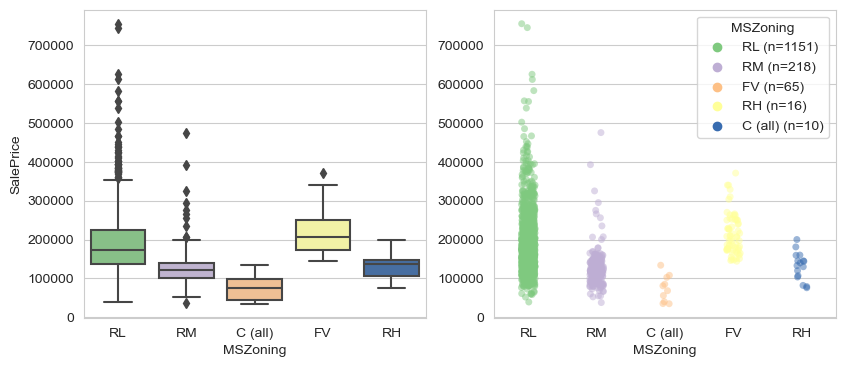

In [42]:
col_name = 'MSZoning'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()


Each class in this categorical feature has different mean and variance for SalePrice, and here is not order in the values. We will create dummy features. 

In [43]:
# create a list of columns for one hot encoding
cat_cols_oh = [col_name]

##### <b>Street</b><br>
Type of road access to property

Grvl	Gravel<br>
Pave	Paved

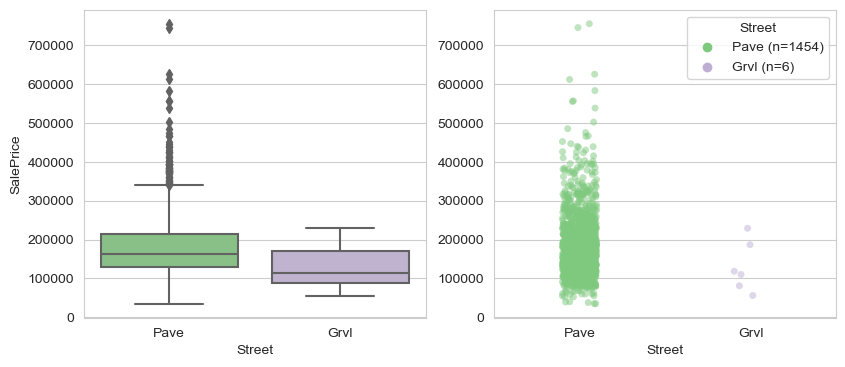

In [44]:
col_name = 'Street'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

There are very low amount of observation for the Grvl, therefore we will drop this feature

In [45]:
# create a list of columns for drop
cat_col_tdrop = [col_name]

##### <b>Alley</b><br>
Type of alley access to property

Grvl	Gravel<br>
       Pave	Paved<br>
       NA 	No alley access

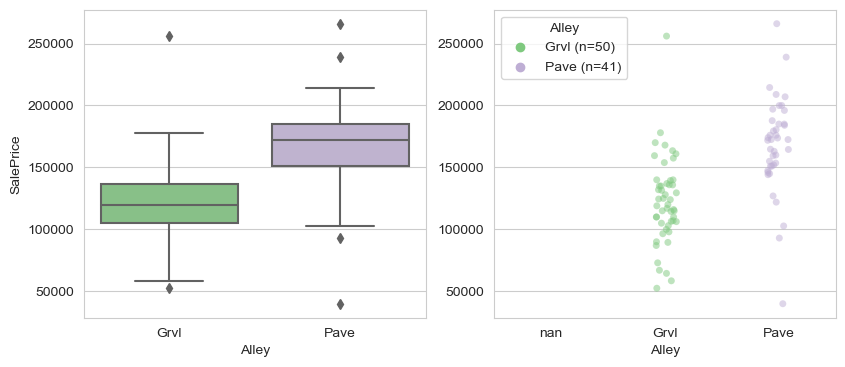

In [46]:
col_name = 'Alley'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

Each class in this categorical feature has different mean and variance for SalePrice, and here is not order in the values. We will create dummy features. 
Also Null values will be filled with the label NA

In [47]:
cat_cols_oh.append(col_name)

##### <b>LotShape</b><br>
General shape of property
Reg	Regular<br>	
IR1	Slightly irregular<br>
IR2	Moderately Irregular<br>
       IR3	Irregular

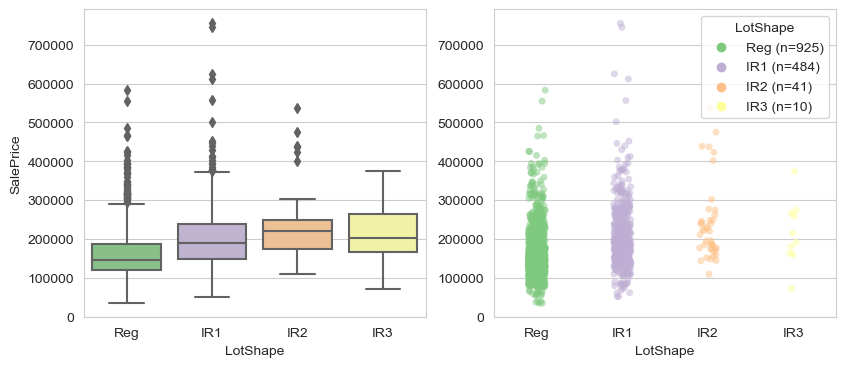

In [48]:
col_name = 'LotShape'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

Each class in this categorical feature has different mean and variance for SalePrice, and here is not order in the values. We will create dummy features. 

In [49]:
cat_cols_oh.append(col_name)

##### <b>LandContour</b><br>
Flatness of the property

Lvl	Near Flat/Level	<br>
Bnk	Banked - Quick and significant rise from street grade to building<br>
HLS	Hillside - Significant slope from side to side<br>
Low	Depression<br>

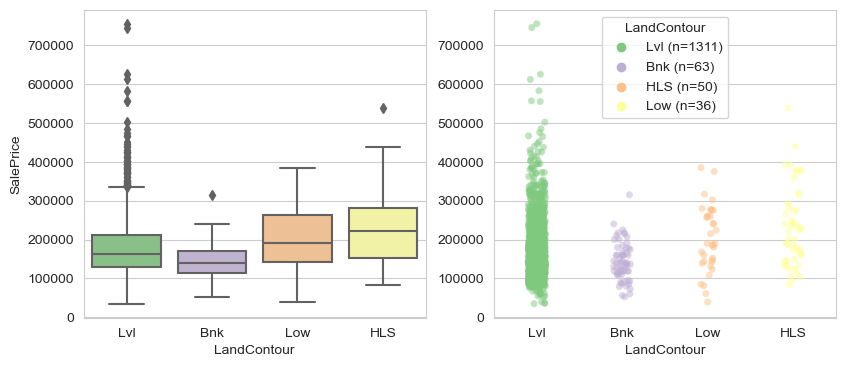

In [50]:
col_name = 'LandContour'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

Each class in this categorical feature has different mean and variance for SalePrice, and here is not order in the values. We will create dummy features. 

In [51]:
cat_cols_oh.append(col_name)

##### <b>Utilities</b><br>
Type of utilities available<br>
		
AllPub	All public Utilities (E,G,W,& S)	<br>
       NoSewr	Electricity, Gas, and Water (Septic Tank)<br>
       NoSeWa	Electricity and Gas Only<br>
       ELO	Electricity only

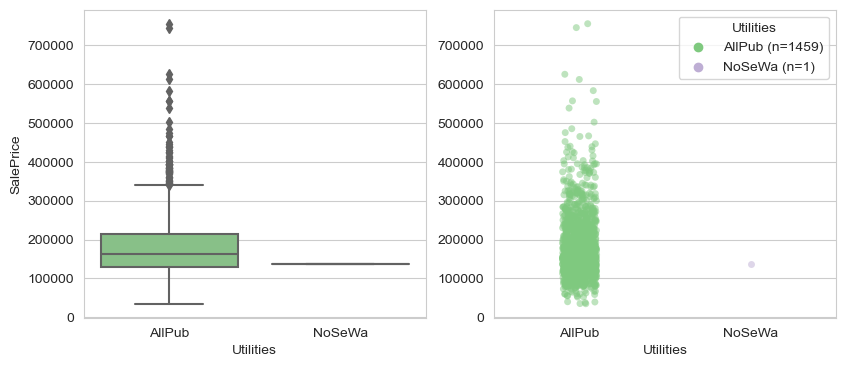

In [52]:
col_name = 'Utilities'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

The most entries are in one class, so we will drop this feature

In [53]:
cat_col_tdrop.append(col_name)

##### <b>LotConfig</b><br>
Lot configuration

Inside	Inside lot<br>
       Corner	Corner lot<br>
       CulDSac	Cul-de-sac<br>
       FR2	Frontage on 2 sides of property<br>
       FR3	Frontage on 3 sides of property<br>
	

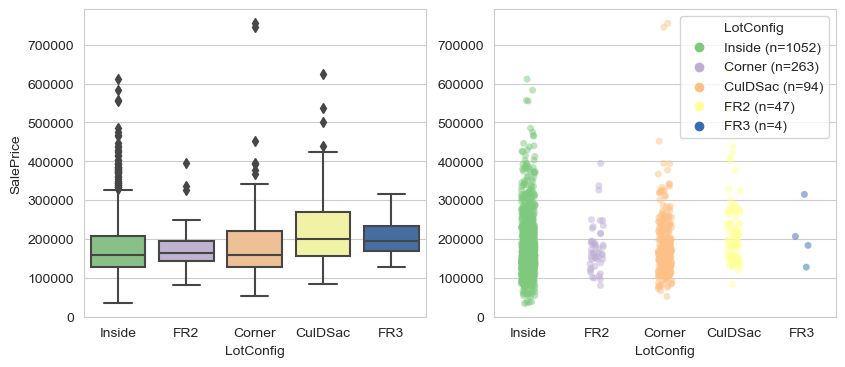

In [54]:
col_name = 'LotConfig'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

There are only 4 entries with the class FR3, and FR2 and FR3 classes look similar. We will merge these classes and create dummy features

In [78]:
# test values transformation
tdf.loc[tdf['LotConfig']=='FR3', 'LotConfig'] = 'FR2'
tdf['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          51
Name: count, dtype: int64

In [56]:
cat_cols_oh.append(col_name)

##### <b>LandSlope</b><br>
Slope of property
		
Gtl	Gentle slope<br>
       Mod	Moderate Slope<br>	
       Sev	Severe Slope

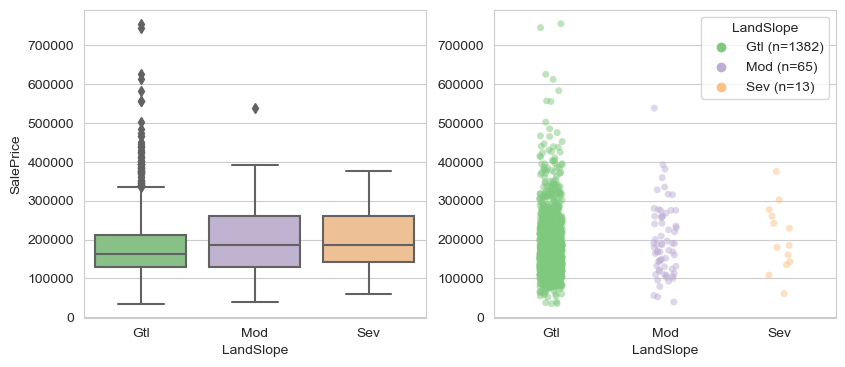

In [57]:
col_name = 'LandSlope'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

There is no big difference between Mod and Sev classes, so we will merge it and create a column which indicate gentle slope and drop the original column

In [79]:
tdf.loc[tdf['LandSlope']=='Sev', 'LandSlope'] = 'Mod'
tdf['GtlSlope'] = tdf['LandSlope'].apply(lambda x: 1 if x=='Gtl' else 0)
tdf[['LandSlope', 'GtlSlope']][:5]

LandSlope  GtlSlope
0       Gtl         1
1       Gtl         1
2       Gtl         1
3       Gtl         1
4       Gtl         1

In [80]:
cat_col_tdrop.append(col_name)

##### <b>Neighborhood</b><br>
Physical locations within Ames city limits<br>

Blmngtn	Bloomington Heights<br>
       Blueste	Bluestem<br>
       BrDale	       Briardale<br>
       BrkSide	Brookside<br>
       ClearCr	Clear Creek<br>
       CollgCr	College Creek<br>
       Crawfor	Crawford<br>
       Edwards	Edwards<br>
       Gilbert	Gilbert<br>
       IDOTRR	       Iowa DOT and Rail Road<br>
       MeadowV	Meadow Village<br>
       Mitchel	Mitchell<br>
       Names	       North Ames<br>
       NoRidge	Northridge<br>
       NPkVill	Northpark Villa<br>
       NridgHt	Northridge Heights<br>
       NWAmes     Northwest Ames<br>
       OldTown	Old Town<br>
       SWISU	South & West of Iowa State University<br>
       Sawyer	Sawyer<br>
       SawyerW	Sawyer West<br>
       Somerst	Somerset<br>
       StoneBr	Stone Brook<br>
       Timber	Timberland<br>
       Veenker	Veenker

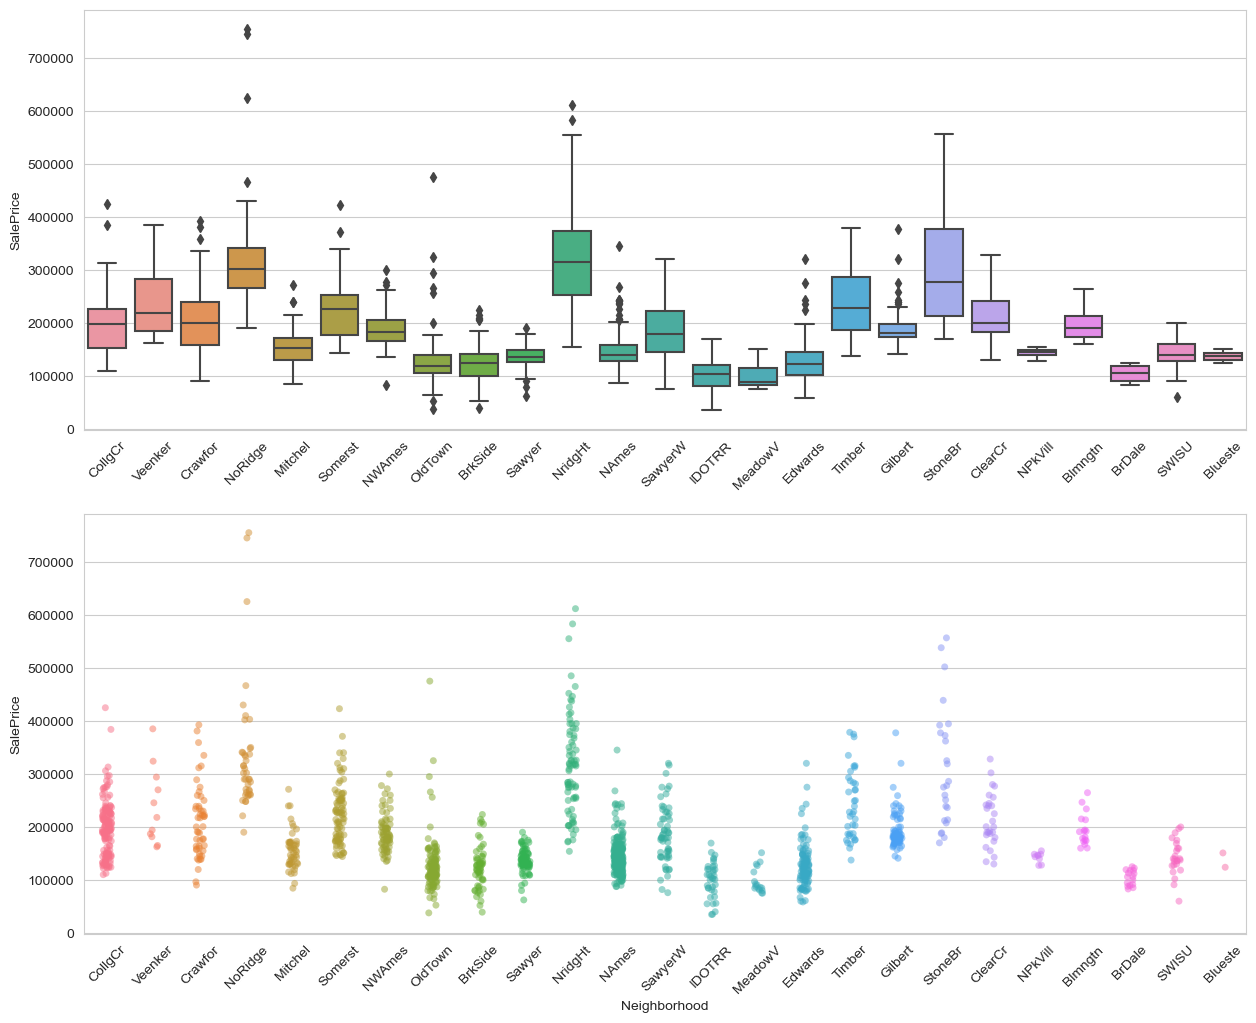

In [60]:
col_name = 'Neighborhood'

plt.figure(figsize=(15, 12))

ax1 = plt.subplot(2, 1, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)
plt.xticks(rotation=45)
ax1.set_xlabel('')

ax2 = plt.subplot(2, 1, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
#ax2.legend(handles, legend_labels, title=col_name)
plt.xticks(rotation=45)
ax2.get_legend().set_visible(False)
plt.show()

In [202]:
cat_cols_oh.remove('Neighborhood')

##### <b>Condition1 and Condition2</b><br>
Proximity to various conditions<br>
Proximity to various conditions (if more than one is present)<br>
	
Artery	Adjacent to arterial street<br>
Feedr	Adjacent to feeder street	<br>
Norm	Normal	<br>
RRNn	Within 200' of North-South Railroad<br>
RRAn	Adjacent to North-South Railroad<br>
PosN	Near positive off-site feature--park, greenbelt, etc.<br>
PosA	Adjacent to postive off-site feature<br>
RRNe	Within 200' of East-West Railroad<br>
RRAe	Adjacent to East-West Railroad<br>

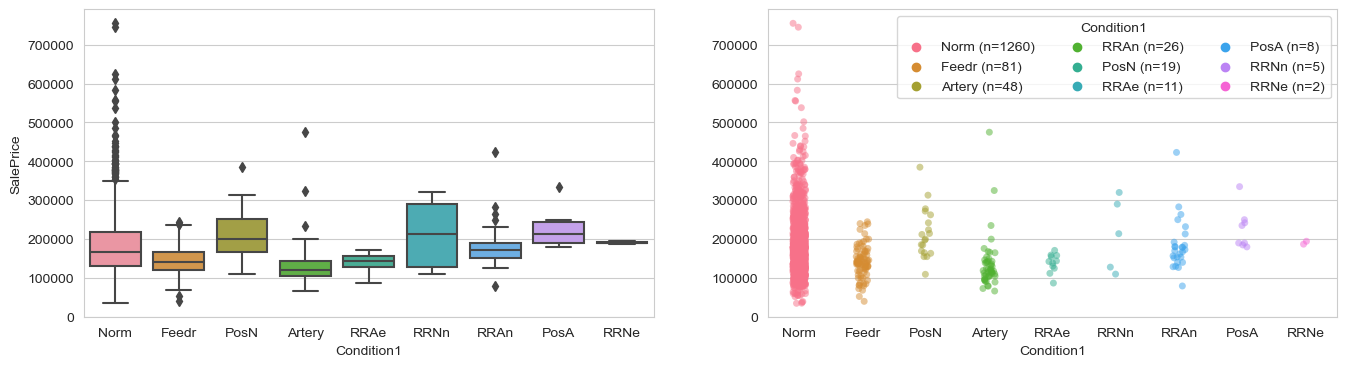

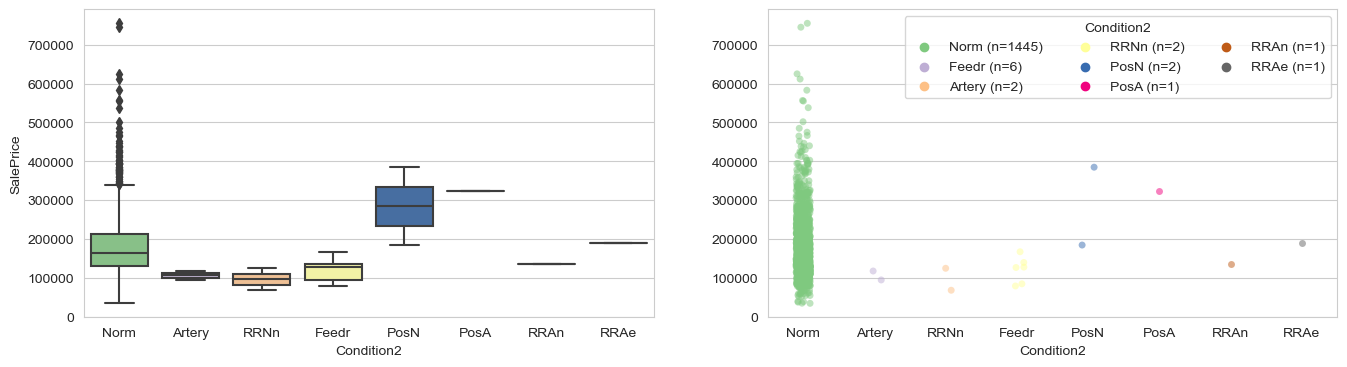

In [61]:
col_name = ['Condition1', 'Condition2']

for cn in col_name:

    plt.figure(figsize=(25, 4))

    ax1 = plt.subplot(1, 3, 1)
    sns.boxplot(data=df, x=cn, y='SalePrice', ax=ax1)

    ax2 = plt.subplot(1, 3, 2)
    sns.stripplot(data=df, x=cn, y='SalePrice', hue=cn, ax=ax2, alpha=0.5)
    ax2.set_ylabel('')

    # Create custom legend labels with the count of each category
    legend_labels = [f'{i[0]} (n={i[1]})' for i in df[cn].value_counts().items()]
    handles, _ = ax2.get_legend_handles_labels()
    ax2.legend(handles, legend_labels, title=cn, loc=1, ncols=3)

    plt.show()

Based on the description we will merge next classes: RRNn and RRAn, RRNe and RRAe, PosN and PosA. It doesn't seem that Conditional 2 has meaningful information, we will drop it.

In [86]:
# test transformation
for cc in [['RRNn', 'RRAn'], ['RRNe', 'RRAe'], ['PosN', 'PosA']]:
    tdf.loc[tdf['Condition1']==cc[0], 'Condition1'] = cc[1]
tdf['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        31
PosA        27
RRAe        13
Name: count, dtype: int64

In [90]:
cat_cols_oh.append('Condition1')
cat_col_tdrop.append('Condition2')

##### <b>BldgType</b><br>
Type of dwelling
		
1Fam	Single-family Detached	<br>
2FmCon	Two-family Conversion; originally built as one-family dwelling<br>
Duplx	Duplex<br>
TwnhsE	Townhouse End Unit<br>
TwnhsI	Townhouse Inside Unit<br>

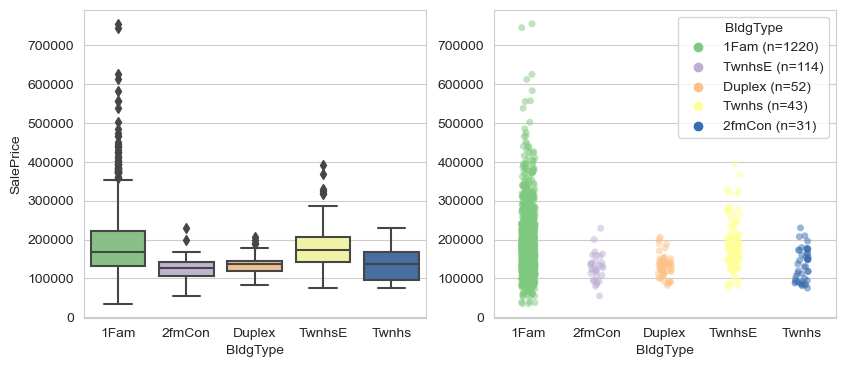

In [230]:
col_name = 'BldgType'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>HouseStyle</b><br>
Style of dwelling
	
1Story	One story<br>
1.5Fin	One and one-half story: 2nd level finished<br>
1.5Unf	One and one-half story: 2nd level unfinished<br>
2Story	Two story<br>
2.5Fin	Two and one-half story: 2nd level finished<br>
2.5Unf	Two and one-half story: 2nd level unfinished<br>
SFoyer	Split Foyer<br>
SLvl	Split Level

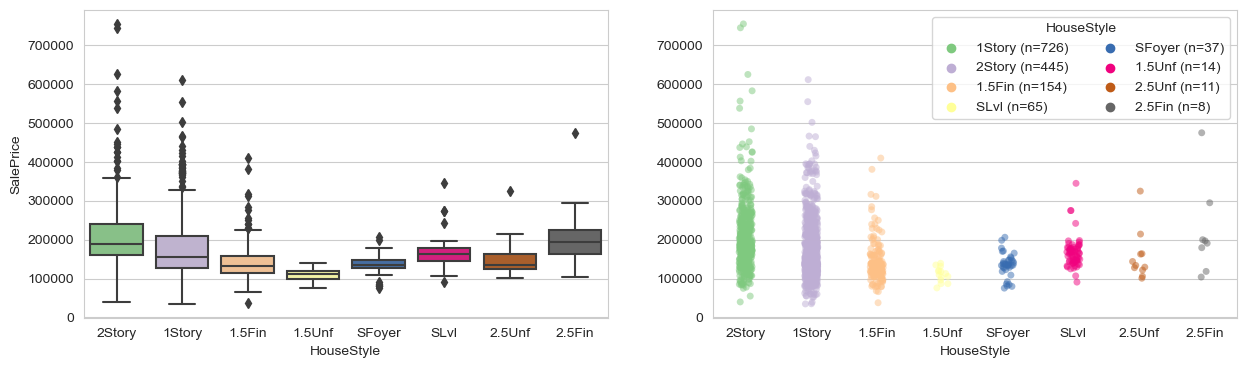

In [286]:
col_name = 'HouseStyle'

plt.figure(figsize=(23, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name, ncol=2)

plt.show()

##### <b>RoofStyle</b>

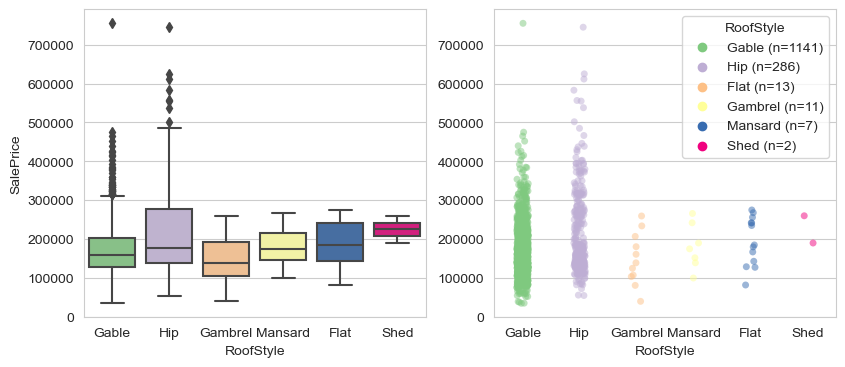

In [255]:
col_name = 'RoofStyle'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

##### <b>RoofMatl</b>

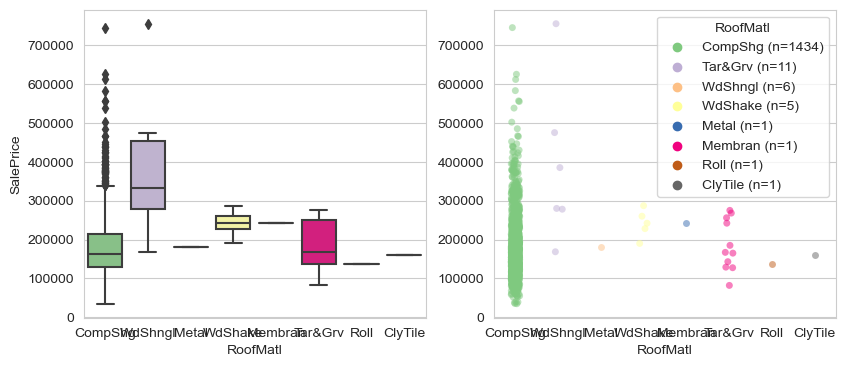

In [256]:
col_name = 'RoofMatl'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>Exterior1st</b>

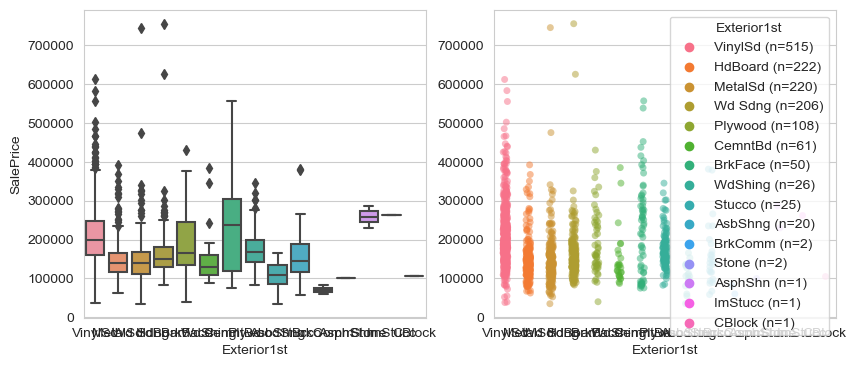

In [257]:
col_name = 'Exterior1st'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>Exterior2nd</b>

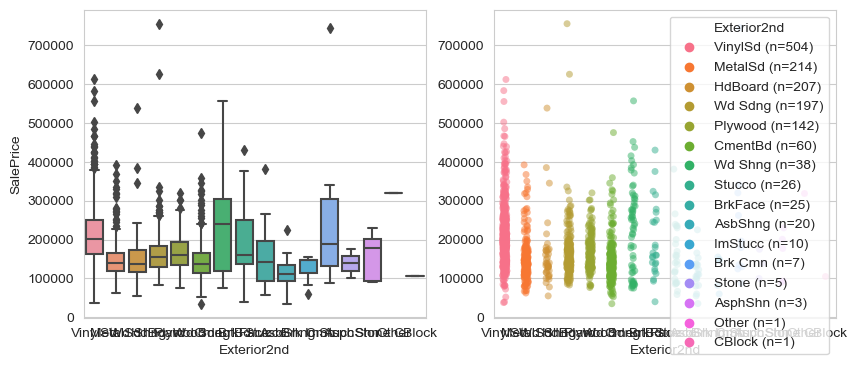

In [258]:
col_name = 'Exterior2nd'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>MasVnrType</b>

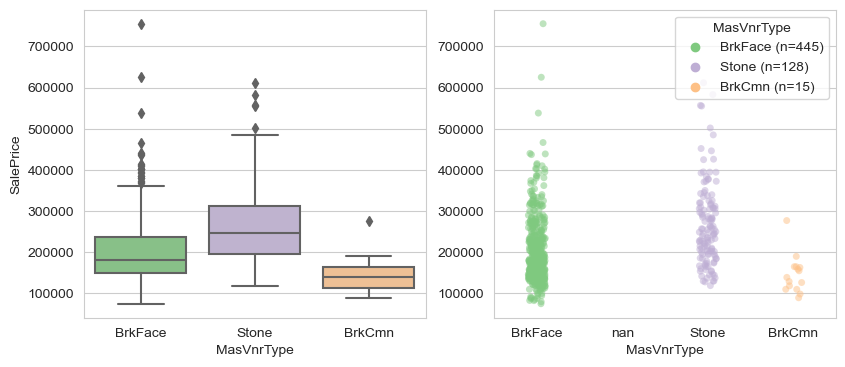

In [259]:
col_name = 'MasVnrType'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>ExterQual</b>

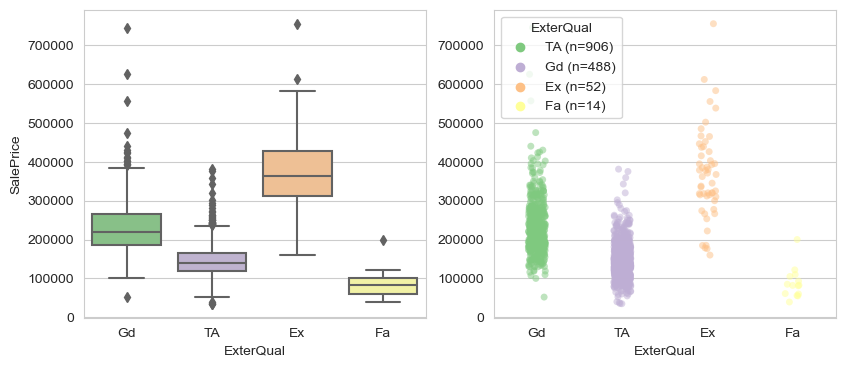

In [260]:
col_name = 'ExterQual'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>ExterCond</b>

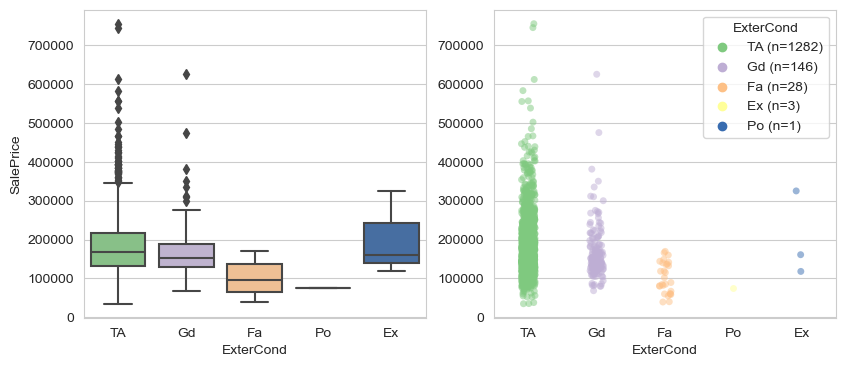

In [261]:
col_name = 'ExterCond'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>Foundation</b>

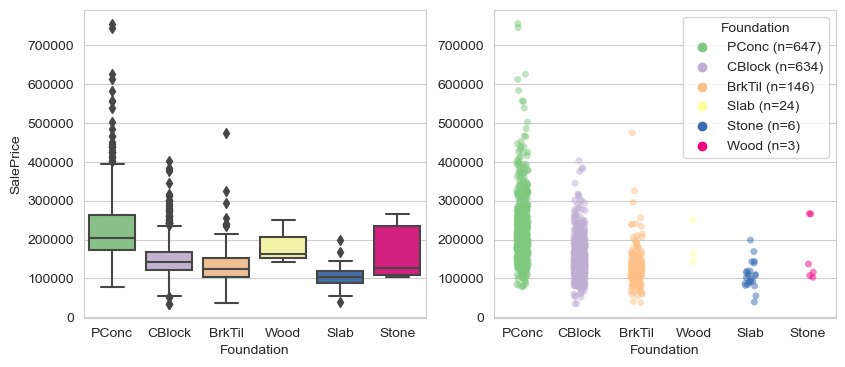

In [262]:
col_name = 'Foundation'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>BsmtQual</b>

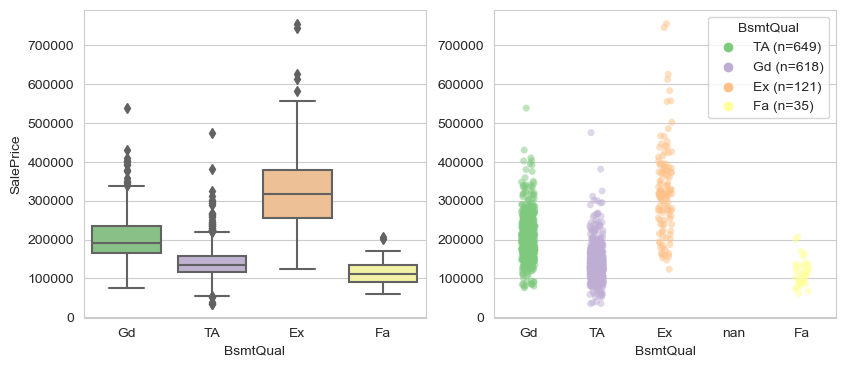

In [263]:
col_name = 'BsmtQual'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>BsmtCond</b>

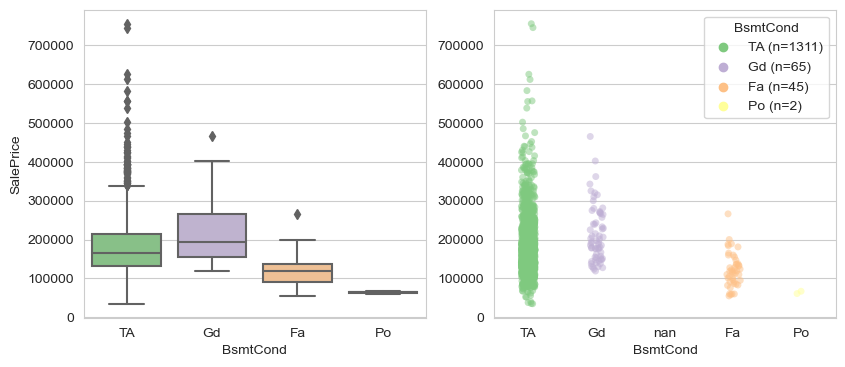

In [264]:
col_name = 'BsmtCond'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>BsmtExposure</b>

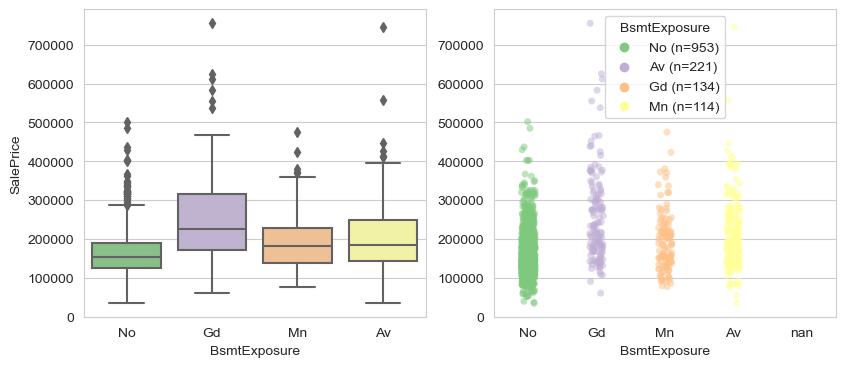

In [265]:
col_name = 'BsmtExposure'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>BsmtFinType1</b>

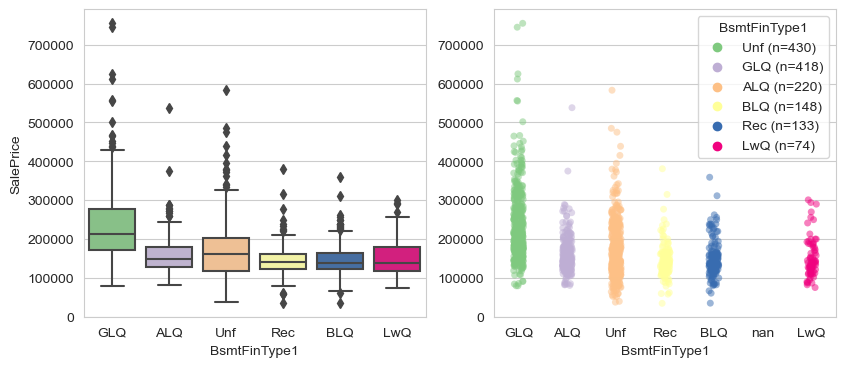

In [267]:
col_name = 'BsmtFinType1'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>BsmtFinType2</b>

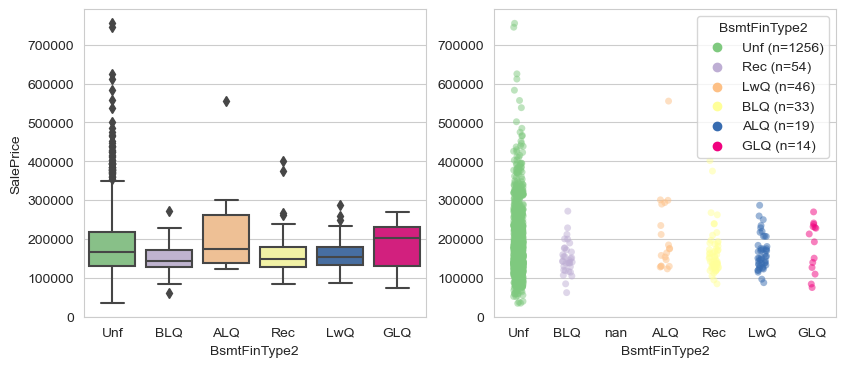

In [268]:
col_name = 'BsmtFinType2'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>Heating</b>

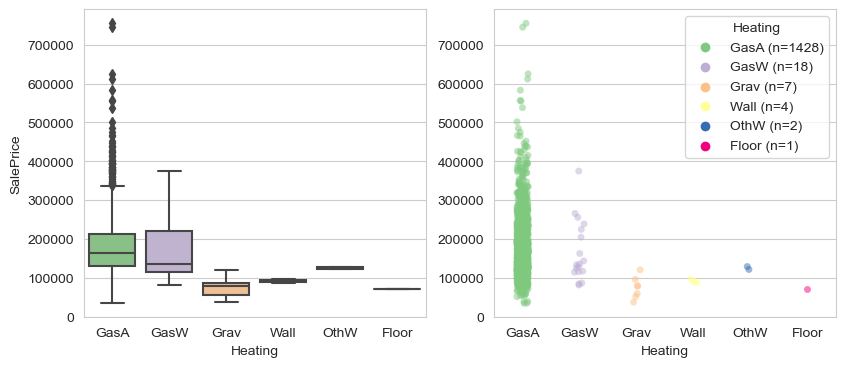

In [269]:
col_name = 'Heating'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>HeatingQC</b>

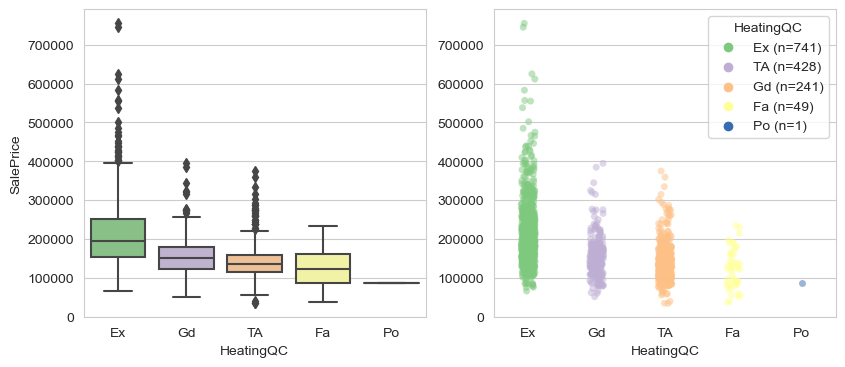

In [270]:
col_name = 'HeatingQC'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>CentralAir</b>

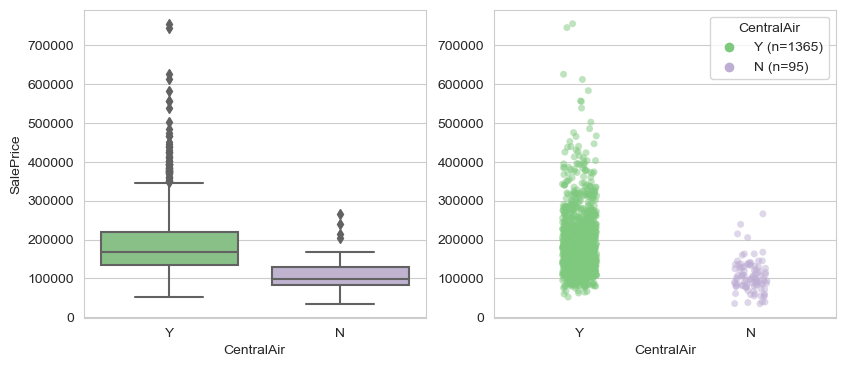

In [271]:
col_name = 'CentralAir'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>Electrical</b>

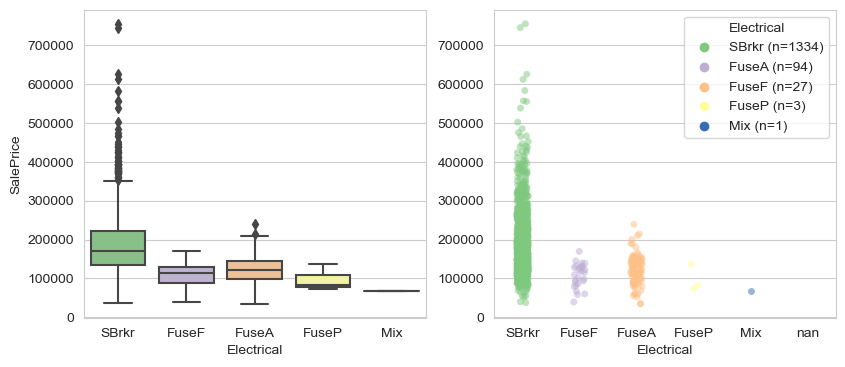

In [272]:
col_name = 'Electrical'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>KitchenQual</b>

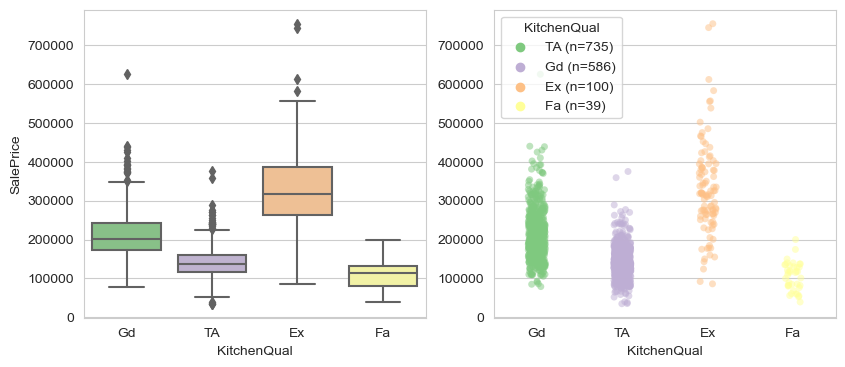

In [273]:
col_name = 'KitchenQual'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>Functional</b>

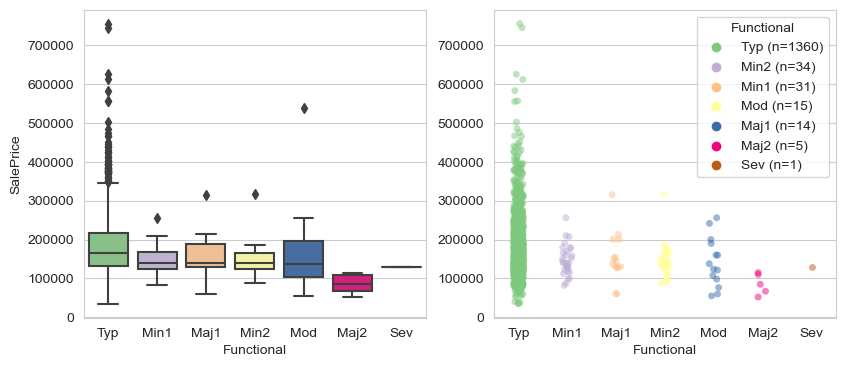

In [274]:
col_name = 'Functional'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>FireplaceQu</b>

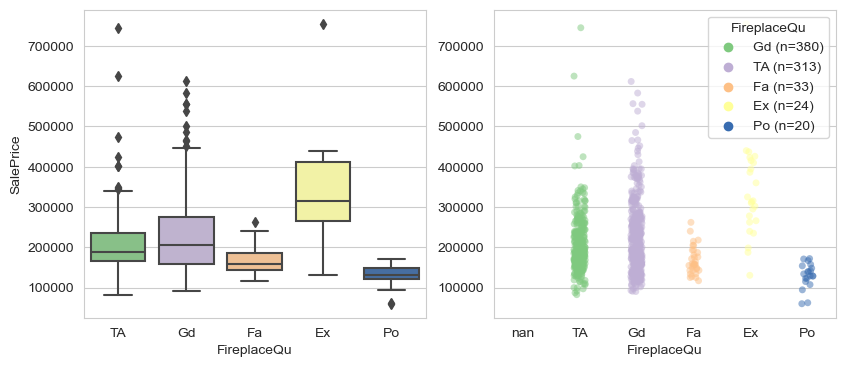

In [275]:
col_name = 'FireplaceQu'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>GarageType</b>

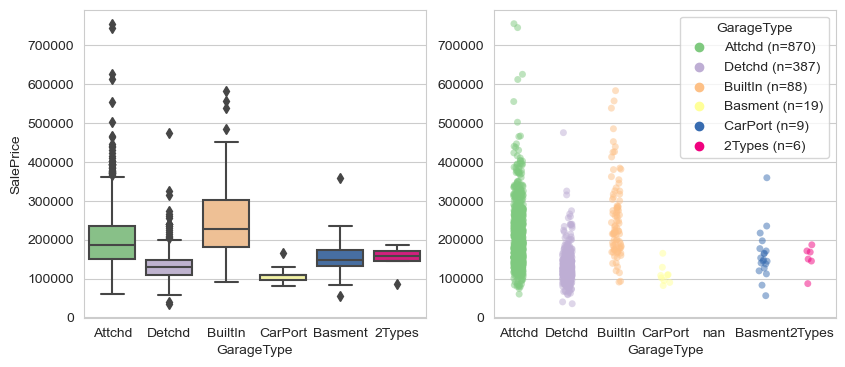

In [276]:
col_name = 'GarageType'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>GarageFinish</b>

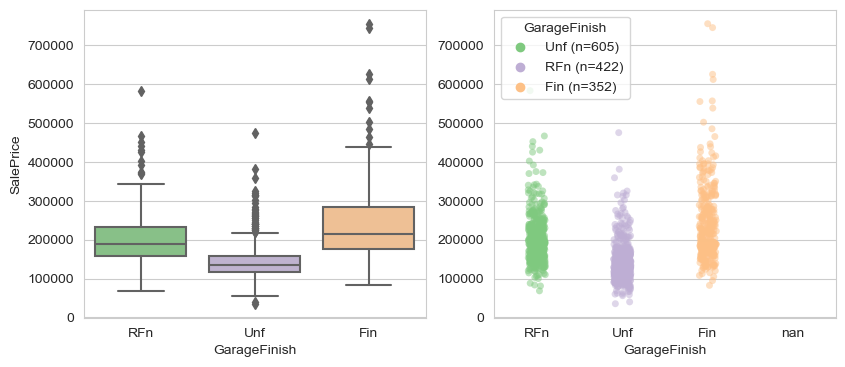

In [277]:
col_name = 'GarageFinish'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>GarageQual</b>

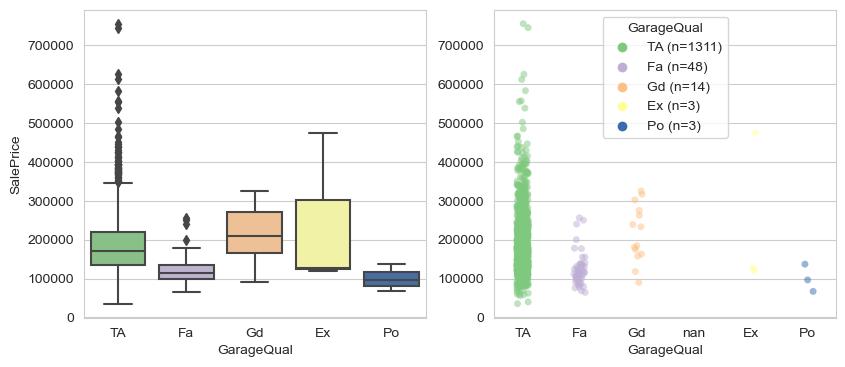

In [278]:
col_name = 'GarageQual'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>GarageCond</b>

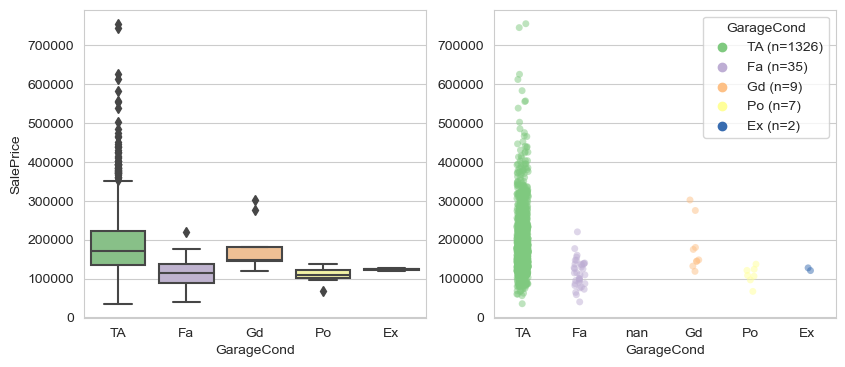

In [279]:
col_name = 'GarageCond'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>PavedDrive</b>

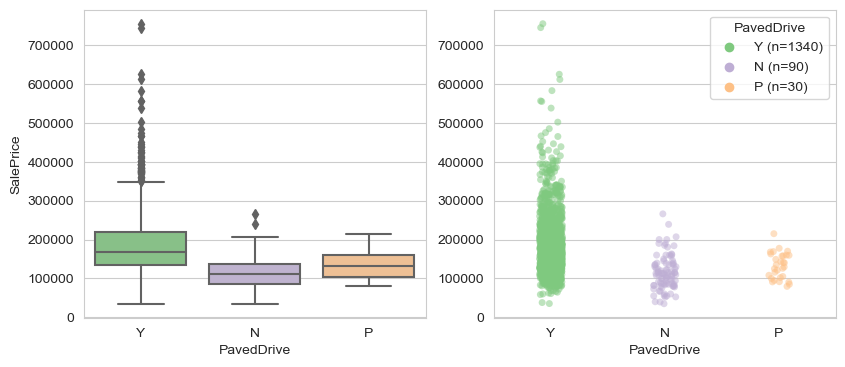

In [280]:
col_name = 'PavedDrive'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>PoolQC</b>

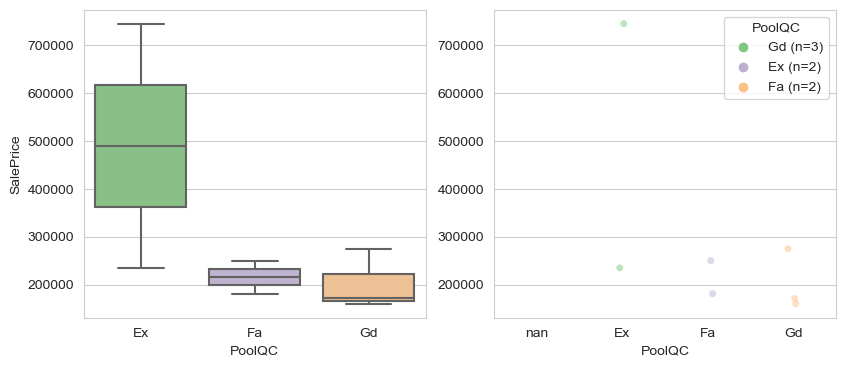

In [281]:
col_name = 'PoolQC'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>Fence</b>

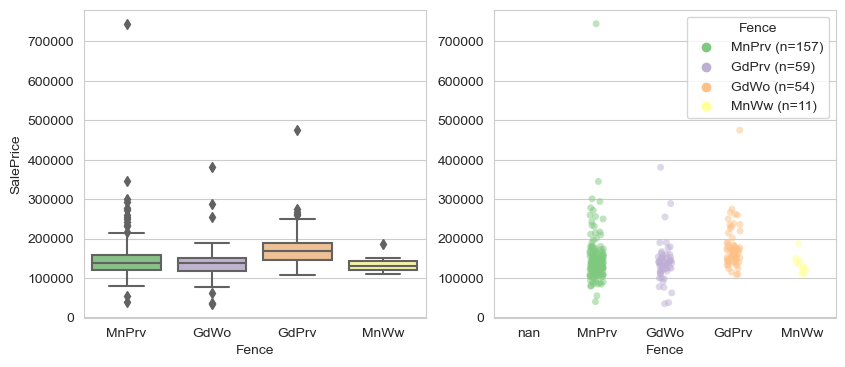

In [282]:
col_name = 'Fence'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>MiscFeature</b>

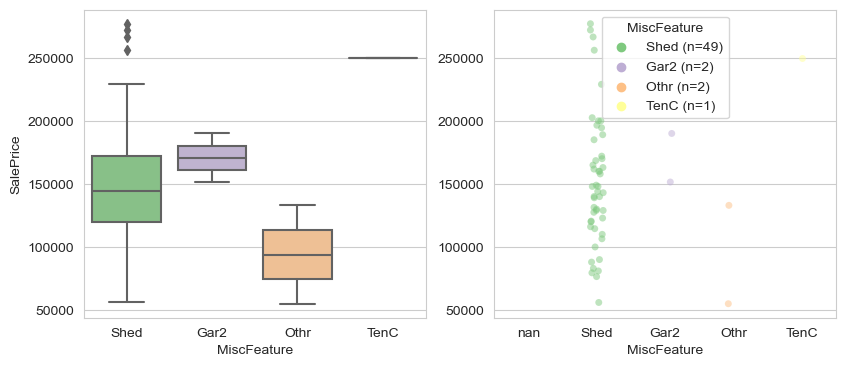

In [283]:
col_name = 'MiscFeature'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>SaleType</b>

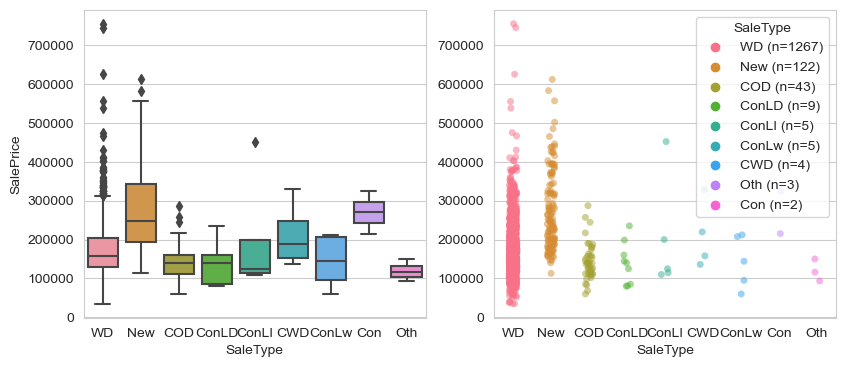

In [284]:
col_name = 'SaleType'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

##### <b>SaleCondition</b>

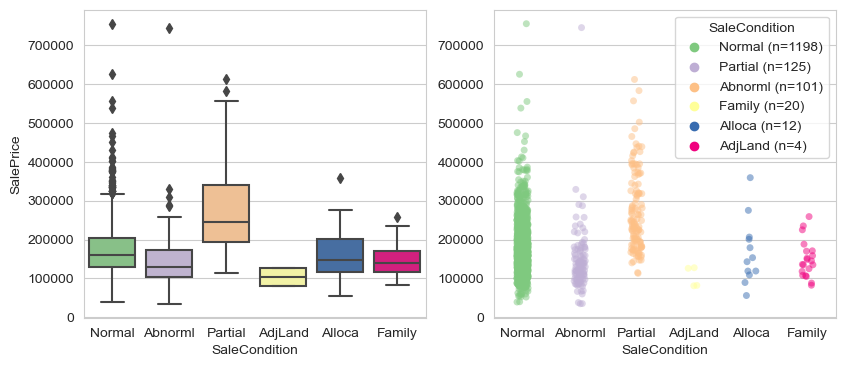

In [285]:
col_name = 'SaleCondition'

plt.figure(figsize=(15, 4))

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(data=df, x=col_name, y='SalePrice', ax=ax1)

ax2 = plt.subplot(1, 3, 2)
sns.stripplot(data=df, x=col_name, y='SalePrice', hue=col_name, ax=ax2, alpha=0.5)
ax2.set_ylabel('')

# Create custom legend labels with the count of each category
legend_labels = [f'{i[0]} (n={i[1]})' for i in df[col_name].value_counts().items()]
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, legend_labels, title=col_name)

plt.show()

In [ ]:
# Calculate the mean 'SalePrice' for each 'Neighborhood'
neighborhood_mean_price = df.groupby('Neighborhood')['SalePrice'].mean()

# Sort neighborhoods by their mean 'SalePrice'
sorted_neighborhoods = neighborhood_mean_price.sort_values().index

# Create the boxplot with sorted neighborhoods
plt.figure(figsize=(20, 10))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, order=sorted_neighborhoods)

plt.show()

We can group neighbourfoods
https://www.cityofames.org/home/showpublisheddocument/1024/637356764775500000
https://www.neighborhoodscout.com/ia/ames

In [ ]:
neghb_dict = {'Northridge': ['NoRidge', 'NridgHt'],\
            ''}

In [ ]:
df_org = df.copy()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Neighborhood', 'SalePrice', 'LotArea', etc.

# Step 1: Preprocess the Data
# Select features for clustering
features = ['SalePrice', 'LotArea']
df_cluster = df[features].dropna()  # Drop rows with missing values

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# Step 2: Apply K-Means Clustering
# Choose the number of clusters (K) - this may require some experimentation
k = 6
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model and predict the cluster labels
df_cluster['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 3: Analyze the Clusters
# Add the 'Neighborhood' back for interpretation
df_cluster['Neighborhood'] = df['Neighborhood']

# Display the first few rows of the clustered data
print(df_cluster.head())

# Optional: Visualize the clusters (if the number of features is 2 or 3 for easy plotting)
plt.scatter(df_cluster['SalePrice'], df_cluster['LotArea'], c=df_cluster['Cluster'])
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.title('K-Means Clustering of Neighborhoods')
plt.show()


In [ ]:
df_cluster.groupby(['Neighborhood', 'Cluster']).count()

### Model construction

#### 1st model

In [ ]:
# define random state
r_st=44

# fill na
df_fm = df.copy()
df_fm[feat_wn] = df_fm[feat_wn].fillna('NA')
df_fm['Electrical'].fillna('NA', inplace=True)

In [ ]:
# get categorical columns numerical index
#df_fm.astype({'MSSubClass': 'object'})
dtype = df_fm.dtypes
c_dtype = dtype[dtype=='object']
cat_cols = list(c_dtype.index)
cat_cols.append('MSSubClass')
df_fm[cat_cols] = df_fm[cat_cols].fillna('NA')
cat_features = [df_fm.columns.get_loc(col)-1 for col in cat_cols] # -1 because we will drop Id column

#
df_fm.drop(['Id', 'SalePrice'], axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_fm, np.log(df['SalePrice']), test_size=0.25, random_state=r_st)

In [ ]:
model = cb.CatBoostRegressor(loss_function='RMSE',
                             cat_features=cat_features)

train_dataset = cb.Pool(X_train, y_train, cat_features=cat_features) 
test_dataset = cb.Pool(X_test, y_test, cat_features=cat_features)

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

In [ ]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(np.log(y_test), np.log(pred))))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

In [ ]:
model_CBR = cb.CatBoostRegressor(loss_function='RMSE',
                             cat_features=cat_features,
                             depth=4,
                             learning_rate = 0.1,
                             iterations=150,
                             l2_leaf_reg=0.2,
                             verbose=False)

model_CBR.fit(train_dataset)
pred = model_CBR.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.5f}'.format(rmse))
print('R2: {:.5f}'.format(r2))

In [ ]:
test_data = pd.read_csv('test.csv')
test_data[feat_wn] = test_data[feat_wn].fillna('NA')
#df_fm['Electrical'].fillna('NA', inplace=True)
tdn = test_data[cat_cols].isna().sum()
tdn[tdn>0]

In [ ]:
test_data[cat_cols] = test_data[cat_cols].fillna('NA')

In [ ]:
test_data[cat_cols] = test_data[cat_cols].fillna('NA')
t_id = test_data['Id']
test_data.drop('Id', axis=1, inplace=True)

In [ ]:

y_tpred_CBR = model_CBR.predict(test_data)

# create submission file
subm = pd.DataFrame()
subm['Id'] = t_id
subm['SalePrice'] = np.exp(y_tpred_CBR)
subm.set_index('Id').to_csv('submission_cbr_ln.csv')

In [ ]:
subm

#### 2nd model

Use feature engineering

In [ ]:
feat_wn = ['MiscFeature',
 'Alley',
 'Fence',
 'MasVnrType',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual']

In [ ]:
# define random state
r_st=44

# fill na
df_fm = df_tmp.copy()
df_fm[feat_wn] = df_fm[feat_wn].fillna('NA')
df_fm['Electrical'].fillna('NA', inplace=True)

# get categorical columns numerical index
dtype = df_fm.dtypes
c_dtype = dtype[dtype=='object']
cat_cols = list(c_dtype.index)
cat_cols.append('MSSubClass')
cat_features = [df_fm.columns.get_loc(col)-1 for col in cat_cols] # -1 because we will drop Id column

#
df_fm.drop(['Id', 'SalePrice'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_fm, df['SalePrice'], test_size=0.25, random_state=r_st)

train_dataset = cb.Pool(X_train, y_train, cat_features=cat_features) 
test_dataset = cb.Pool(X_test, y_test, cat_features=cat_features)

model_CBR2 = cb.CatBoostRegressor(loss_function='RMSE',
                             cat_features=cat_features,
                             depth=4,
                             learning_rate = 0.1,
                             iterations=150,
                             l2_leaf_reg=0.2)

# grid = {'iterations': [200, 250],
#         'learning_rate': [0.5, 0.1],
#         'depth': [2, 4, 6],
#         'l2_leaf_reg': [0.2, 0.5, 1, 3]}

# model_CBR2.grid_search(grid, train_dataset)

In [ ]:
model_CBR2.fit(train_dataset)
pred = model_CBR2.predict(X_test)
rmse = (np.sqrt(mean_squared_error(np.log(y_test), np.log(pred))))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.5f}'.format(rmse))
print('R2: {:.5f}'.format(r2))

In [ ]:
test_data = pd.read_csv('test.csv')
test_data = feat_eng(test_data)


test_data[feat_wn] = test_data[feat_wn].fillna('NA')
#df_fm['Electrical'].fillna('NA', inplace=True)
tdn = test_data[cat_cols].isna().sum()
tdn[tdn>0]

In [ ]:
test_data[cat_cols] = test_data[cat_cols].fillna('NA')
t_id = test_data['Id']
test_data.drop('Id', axis=1, inplace=True)

y_tpred_CBR = model_CBR2.predict(test_data)

# create submission file
subm = pd.DataFrame()
subm['Id'] = t_id
subm['SalePrice'] = y_tpred_CBR
subm.set_index('Id').to_csv('submission_cbr2.csv')

In [ ]:

y_tpred_CBR = model_CBR2.predict(test_data)

# create submission file
subm = pd.DataFrame()
subm['Id'] = t_id
subm['SalePrice'] = y_tpred_CBR
subm.set_index('Id').to_csv('submission_cbr2.csv')

#### 3rd model
kaggle 0.14573

In [ ]:
# drop Id 524 and 1299
# define random state
r_st=44

# fill na
df_fm = df_tmp.copy()
df_fm[feat_wn] = df_fm[feat_wn].fillna('NA')
df_fm['Electrical'].fillna('NA', inplace=True)
df_fm = df_fm[~df_fm['Id'].isin([524, 1299])]

# get categorical columns numerical index
dtype = df_fm.dtypes
c_dtype = dtype[dtype=='object']
cat_cols = list(c_dtype.index)
cat_cols.append('MSSubClass')
cat_features = [df_fm.columns.get_loc(col)-1 for col in cat_cols] # -1 because we will drop Id column

#
sp = df_fm['SalePrice']
df_fm.drop(['Id', 'SalePrice'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_fm, sp, test_size=0.25, random_state=r_st)

train_dataset = cb.Pool(X_train, y_train, cat_features=cat_features) 
test_dataset = cb.Pool(X_test, y_test, cat_features=cat_features)

# model_CBR3 = cb.CatBoostRegressor(loss_function='RMSE',
#                              cat_features=cat_features,
#                              depth=4,
#                              learning_rate = 0.1,
#                              iterations=150,
#                              l2_leaf_reg=0.2)

model_CBR3 = cb.CatBoostRegressor(loss_function='RMSE',
                              cat_features=cat_features)
                                  
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1, 0.5],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

model_CBR3.grid_search(grid, train_dataset)

In [ ]:
model_CBR3.fit(train_dataset)
pred = model_CBR3.predict(X_test)
rmse = (np.sqrt(mean_squared_error(np.log(y_test), np.log(pred))))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.5f}'.format(rmse))
print('R2: {:.5f}'.format(r2))

In [ ]:

y_tpred_CBR = model_CBR3.predict(test_data)

# create submission file
subm = pd.DataFrame()
subm['Id'] = t_id
subm['SalePrice'] = y_tpred_CBR
subm.set_index('Id').to_csv('submission_cbr3.csv')

In [ ]:
tdf = pd.DataFrame({'total_a': test_data['TotalSF_N'], 'pred_price': y_tpred_CBR})

In [ ]:
tdf

In [ ]:
sns.scatterplot(tdf, x='total_a', y='pred_price')

### 4th model
try log

In [ ]:
df['SalePrice'].hist(bins=50)

In [ ]:
df_tmp['SalePrice'].hist(bins=50)

In [ ]:
df_tmp['LogSalePrice'] = np.log(df_tmp['SalePrice'])
df_tmp['LogSalePrice'].hist(bins=50)

In [ ]:
df_tmp

In [ ]:
r_st=44

# fill na
df_fm = df_tmp.copy()
df_fm[feat_wn] = df_fm[feat_wn].fillna('NA')
df_fm['Electrical'].fillna('NA', inplace=True)
df_fm = df_fm[~df_fm['Id'].isin([524, 1299])]

# get categorical columns numerical index
dtype = df_fm.dtypes
c_dtype = dtype[dtype=='object']
cat_cols = list(c_dtype.index)
cat_cols.append('MSSubClass')
cat_features = [df_fm.columns.get_loc(col)-1 for col in cat_cols] # -1 because we will drop Id column

In [ ]:
cat_features

In [ ]:
# drop Id 524 and 1299
# use log for SalePrice
# define random state
r_st=44

# fill na
df_fm = df_tmp.copy()
df_fm[feat_wn] = df_fm[feat_wn].fillna('NA')
df_fm['Electrical'].fillna('NA', inplace=True)
df_fm = df_fm[~df_fm['Id'].isin([524, 1299])]

# get categorical columns numerical index
dtype = df_fm.dtypes
c_dtype = dtype[dtype=='object']
cat_cols = list(c_dtype.index)
cat_cols.append('MSSubClass')
cat_features = [df_fm.columns.get_loc(col)-1 for col in cat_cols] # -1 because we will drop Id column

#
sp = df_fm['LogSalePrice']
df_fm.drop(['Id', 'SalePrice', 'LogSalePrice'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_fm, sp, test_size=0.25, random_state=r_st)

train_dataset = cb.Pool(X_train, y_train, cat_features=cat_features) 
test_dataset = cb.Pool(X_test, y_test, cat_features=cat_features)

# model_CBR3 = cb.CatBoostRegressor(loss_function='RMSE',
#                              cat_features=cat_features,
#                              depth=4,
#                              learning_rate = 0.1,
#                              iterations=150,
#                              l2_leaf_reg=0.2)

model_CBR4 = cb.CatBoostRegressor(loss_function='RMSE',
                              cat_features=cat_features,
                              verbose=False)
                                  
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1, 0.5],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3, 5]}

model_CBR4.grid_search(grid, train_dataset)

In [ ]:
model_CBR4.fit(train_dataset)
pred = model_CBR4.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.5f}'.format(rmse))
print('R2: {:.5f}'.format(r2))

In [ ]:
df['SalePrice']

In [ ]:
test_data = pd.read_csv('test.csv')
test_data = feat_eng(test_data)


test_data[feat_wn] = test_data[feat_wn].fillna('NA')
#df_fm['Electrical'].fillna('NA', inplace=True)
tdn = test_data[cat_cols].isna().sum()
tdn[tdn>0]

test_data[cat_cols] = test_data[cat_cols].fillna('NA')
t_id = test_data['Id']
test_data.drop('Id', axis=1, inplace=True)

In [ ]:
y_tpred_CBR = model_CBR4.predict(test_data)

# create submission file
subm = pd.DataFrame()
subm['Id'] = t_id
subm['SalePrice'] = np.exp(y_tpred_CBR)
subm.set_index('Id').to_csv('submission_cbr4.csv')

#### 5th model lgb

In [ ]:
# define random state
r_st=42

# fill na
df_fm = df.copy()
df_fm[feat_wn] = df_fm[feat_wn].fillna('NA')
df_fm['Electrical'].fillna('NA', inplace=True)

df_fm = feat_eng(df_fm )

# get categorical columns numerical index
dtype = df_fm.dtypes
c_dtype = dtype[dtype=='object']
cat_cols = list(c_dtype.index)
cat_cols.append('MSSubClass')
cat_features = [df_fm.columns.get_loc(col)-1 for col in cat_cols] # -1 because we will drop Id column

In [ ]:
c_dtype = df_fm.dtypes
# we need to convert our categorical feature to numerical
for c in c_dtype[c_dtype=='object'].index:
    df_fm[c] = df_fm[c].astype('category').cat.codes

In [ ]:
#
df_fm.drop(['Id', 'SalePrice'], axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_fm, np.log1p(df['SalePrice']), test_size=0.25, random_state=r_st)


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
hyper_params = {
    'metric': 'rmse',
    'learning_rate': 0.05,
    "num_leaves": 400,  
    "num_iterations": 400,
    'verbosity': -1,
    'n_estimators': 250}

In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': -1,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 1000,
    'n_estimators': 250
}

In [ ]:

# Create an instance of the LightGBM Regressor with the RMSE metric.
model_lgb = LGBMRegressor(**hyper_params)
 
# Train the model using the training data.
model_lgb.fit(X_train, y_train, categorical_feature=cat_features)
 

In [ ]:

pred = model_lgb.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.5f}'.format(rmse))
print('R2: {:.5f}'.format(r2))

In [ ]:
test_data = pd.read_csv('test.csv')

test_data[feat_wn] = test_data[feat_wn].fillna('NA')
test_data = feat_eng(test_data)



#df_fm['Electrical'].fillna('NA', inplace=True)

c_dtype = test_data.dtypes
# we need to convert our categorical feature to numerical
for c in c_dtype[c_dtype=='object'].index:
    test_data[c] = test_data[c].astype('category').cat.codes


In [ ]:
# test_data[cat_cols] = test_data[cat_cols].fillna('NA')
t_id = test_data['Id']
test_data.drop('Id', axis=1, inplace=True)

In [ ]:

y_tpred_lgb = model_lgb.predict(test_data)

# create submission file
subm = pd.DataFrame()
subm['Id'] = t_id
subm['SalePrice'] = np.expm1(y_tpred_lgb)
subm.set_index('Id').to_csv('submission_lgb.csv')

#### 6 th model

In [ ]:
gar_col_drop = ['GarageType', 'GarageCars', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
        'GarageCond']
# ['GarageType', 'GarageCars', 'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual',
#         'GarageCond']

In [ ]:
# df_t = df[gar_col_drop]

# # we need to convert our categorical feature to numerical
# c_dtype = df_t.dtypes
# for c in c_dtype[c_dtype=='object'].index:
#     df_t[c] = df_t[c].astype('category').cat.codes

# corr_feats = df_t.corr(method='spearman')['SalePrice'].sort_values(ascending=False)
# # h_corr_feats = corr_feats[abs(corr_feats) >= 0.5]
# # h_corr_feats
# corr_feats

In [ ]:
feat_wn

In [ ]:
n_feat_wn = [x for x in feat_wn if x not in gar_col_drop]

In [ ]:
n_feat_wn

In [ ]:
# define random state
r_st=42

# fill na
df_fm = df.copy()
#df_fm = df_fm.drop(gar_col_drop, axis=1)
df_fm[feat_wn] = df_fm[feat_wn].fillna('NA')

# # Create dummy columns based on values in MiscFeature
# dummy_columns = pd.get_dummies(df_fm['MiscFeature'], prefix='mf')

# # Multiply each dummy column by corresponding MiscVal
# for col in dummy_columns.columns:
#     dummy_columns[col] = dummy_columns[col] * df_fm['MiscVal']

# # Concatenate the dummy columns with the original DataFrame
# df_fm = pd.concat([df_fm, dummy_columns], axis=1)

# # Drop the original 'MiscFeature' column
# # df_fm.drop(['MiscFeature','MiscVal'], axis=1, inplace=True)
# df_fm.drop('MiscVal', axis=1, inplace=True)

df_fm['Electrical'].fillna('NA', inplace=True)

#df_fm = feat_eng(df_fm)

# get categorical columns numerical index
dtype = df_fm.dtypes
c_dtype = dtype[dtype=='object']
cat_cols = list(c_dtype.index)
for c in ['MSSubClass']:#, 'OverallQual', 'OverallCond']:
    cat_cols.append(c)

cat_features = [df_fm.columns.get_loc(col)-1 for col in cat_cols] # -1 because we will drop Id column

c_dtype = df_fm.dtypes
# we need to convert our categorical feature to numerical
for c in c_dtype[c_dtype=='object'].index:
    df_fm[c] = df_fm[c].astype('category').cat.codes

label = df_fm['SalePrice']
df_fm.drop(['Id', 'SalePrice'], axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_fm, np.log1p(label), test_size=0.25, random_state=r_st)


In [ ]:

# Create an instance of the LightGBM Regressor with the RMSE metric.
model_lgb = LGBMRegressor(**hyper_params)
 
# Train the model using the training data.
model_lgb.fit(X_train, y_train, categorical_feature=cat_features)
 

In [ ]:

pred = model_lgb.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.5f}'.format(rmse))
print('R2: {:.5f}'.format(r2))

In [ ]:
feat_imp = pd.Series(model_lgb.feature_importances_, index=df_fm.columns)
feat_imp.sort_values(ascending=True).plot(kind='barh', figsize=(8,20))

## Test

In [203]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


def fill_miss(df):

    df_upd = df.copy()

    # fill columns wheare missing values have a meaning NA
    feat_wn = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual']
    
    for c in df_upd.columns:
        if c in feat_wn:
            df_upd[c].fillna('NA', inplace=True)

    # fill with mean missing num features
    num_si = SimpleImputer(strategy='mean')
    num_col= df_upd.dtypes[df_upd.dtypes != 'object']
    df_upd[num_col.index] = num_si.fit_transform(df_upd[num_col.index])

    # fill with most frequent categorical features
    cat_si = SimpleImputer(strategy='most_frequent')
    cat_col= df_upd.dtypes[df_upd.dtypes == 'object']
    df_upd[cat_col.index] = cat_si.fit_transform(df_upd[cat_col.index])


    return df_upd

def feat_eng(df):
    df_upd = df.copy()
    col_tdrop = []

    # remove double calc in SF feat
    col_tdrop += ['GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']

    # remove double calc in room
    col_tdrop += ['BedroomAbvGr']#, 'KitchenAbvGr']

    # calculate remodelling age
    df_upd['HRemAge'] = df['YrSold'] - df['YearRemodAdd']
    col_tdrop += ['YearRemodAdd']


    # create new feature for bathrooms
    df_upd['Bath'] = df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath'] + df['FullBath'] + 0.5 * df['HalfBath']
    col_tdrop += ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

    df_upd = df_upd.drop(col_tdrop, axis=1)

    return df_upd

def norm_num_col(df):
    df_upd = df.copy()
    
    for cl in ['LotArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GarageArea', 'LotFrontage']:
        if cl in df_upd.columns:
            df_upd[cl] = np.log(df_upd[cl])

    return df_upd



def transf_cat(df, cat_cols_oh, cat_col_tdrop):
    df_upd = df.copy()

    # merge values in LotConfig
    if 'LotConfig' in  df_upd.columns:
        df_upd.loc[df_upd['LotConfig']=='FR3', 'LotConfig'] = 'FR2'


    #
    if 'LandSlope' in  df_upd.columns:
        df_upd.loc[df_upd['LandSlope']=='Sev', 'LandSlope'] = 'Mod'
        df_upd['GtlSlope'] = df_upd['LandSlope'].apply(lambda x: 1 if x=='Gtl' else 0)
        df_upd[['LandSlope', 'GtlSlope']][:5]

    # merge values in Conditional1
    for cc in [['RRNn', 'RRAn'], ['RRNe', 'RRAe'], ['PosN', 'PosA']]:
        df_upd.loc[df_upd['Condition1']==cc[0], 'Condition1'] = cc[1]


    # transform 
    oec = OrdinalEncoder(categories = [['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']]) 
    for cc in ['FireplaceQu', 'KitchenQual', 'HeatingQC', 'PoolQC', 'BsmtQual', 'ExterQual', 'ExterCond']:
        if cc in df_upd.columns:
            df_upd[cc] = oec.fit_transform(df_upd[[cc]])

    
    class GetDummiesTransformer(BaseEstimator, TransformerMixin):
        def __init__(self, *args, pandas_params={}, **kwargs):
            super().__init__(*args, **kwargs)
            self._pandas_params = pandas_params
        def fit(self, X, y=None):
            return self
        def transform(self, X, y=None):
            return pd.get_dummies(X, dtype = 'int', **self._pandas_params)
    
    df_upd = GetDummiesTransformer(pandas_params={'columns':cat_cols_oh}).transform(df_upd)

    df_upd = df_upd.drop(cat_col_tdrop, axis=1)

    return df_upd


In [204]:
cat_cols_oh

['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Condition1']

In [205]:
tmpdf = df.copy()
tmpdf = fill_miss(tmpdf)
tmpdf = feat_eng(tmpdf)
tmpdf = norm_num_col(tmpdf)
tmpdf = transf_cat(tmpdf, cat_cols_oh, cat_col_tdrop)

df_fm = tmpdf.copy()


In [206]:
dtype = df_fm.dtypes
c_dtype = dtype[dtype=='object']
cat_cols = list(c_dtype.index)
for c in ['MoSold', 'YrSold']:#, 'OverallQual', 'OverallCond']:
    cat_cols.append(c)

cat_features = [df_fm.columns.get_loc(col)-1 for col in cat_cols] # -1 because we will drop Id column

c_dtype = df_fm.dtypes
# we need to convert our categorical feature to numerical
for c in c_dtype[c_dtype=='object'].index:
    df_fm[c] = df_fm[c].astype('category').cat.codes

label = df_fm['SalePrice']
df_fm.drop(['Id', 'SalePrice'], axis=1, inplace=True)

In [207]:
r_st = 42

In [208]:
X_train, X_test, y_train, y_test = train_test_split(df_fm, np.log1p(label), test_size=0.25, random_state=r_st)

In [229]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LandSlope', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'HRemAge', 'Bath', 'GtlSlope', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_R

In [209]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 9,
    'verbose': -1,
    "max_depth": 9,
    "num_leaves": 200,  
    "max_bin": 512,
    "num_iterations": 1000,
    'n_estimators': 250
}

In [210]:
# Create an instance of the LightGBM Regressor with the RMSE metric.
model_lgb = LGBMRegressor(**hyper_params)
 
# Train the model using the training data.
model_lgb.fit(X_train, y_train, categorical_feature=cat_features)

[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero


LGBMRegressor(bagging_fraction=0.7, bagging_freq=9, feature_fraction=0.9,
              learning_rate=0.05, max_bin=512, max_depth=9, metric='rmse',
              n_estimators=250, num_iterations=1000, num_leaves=200,
              task='train', verbose=-1)

In [211]:

pred = model_lgb.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.5f}'.format(rmse))
print('R2: {:.5f}'.format(r2))

Testing performance
RMSE: 0.12935
R2: 0.90338


In [212]:
df_fm.shape

(1460, 89)

<Axes: >

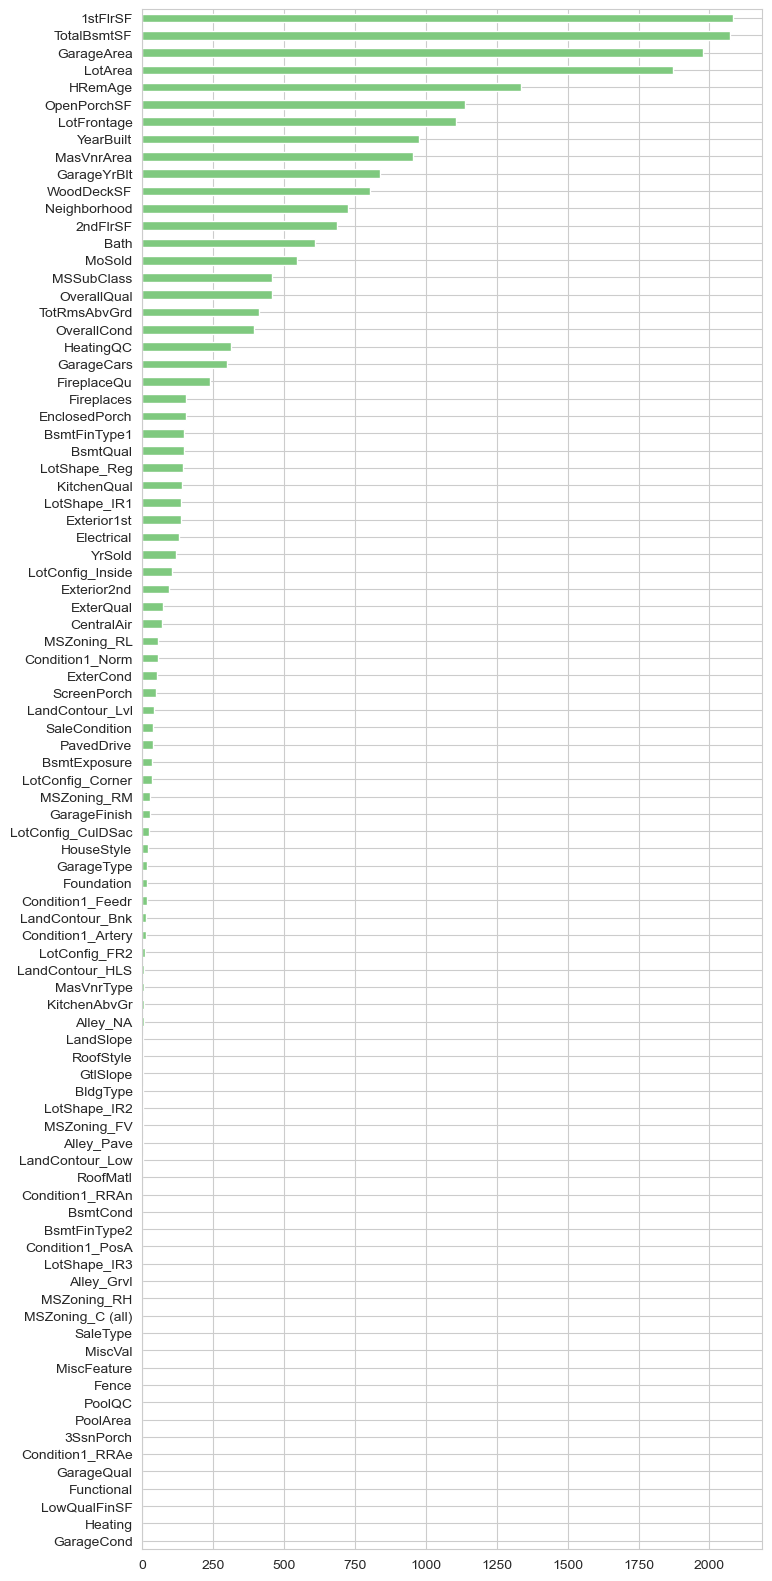

In [213]:
feat_imp = pd.Series(model_lgb.feature_importances_, index=df_fm.columns)
feat_imp.sort_values(ascending=True).plot(kind='barh', figsize=(8,20))

### Let's check outliers for the most important features

In [162]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

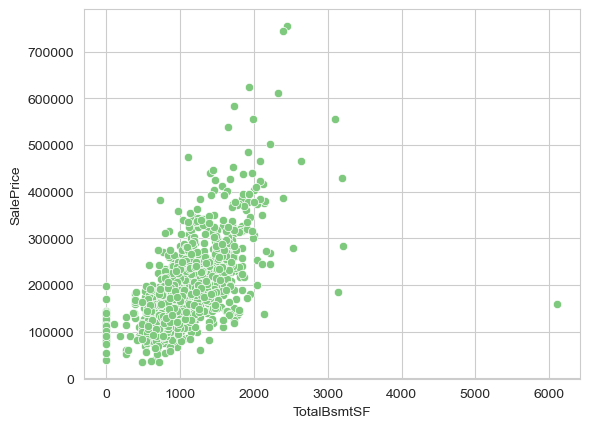

In [163]:
sns.scatterplot(df, x='TotalBsmtSF', y='SalePrice')

In [164]:
rem_id = []

# remove > 5000
rem_id += list(df.query('TotalBsmtSF>5000')['Id'].values)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

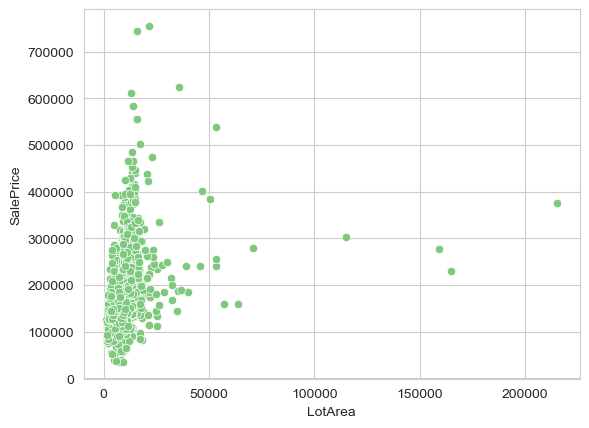

In [165]:
sns.scatterplot(df, x='LotArea', y='SalePrice')

In [166]:
# remove > 1000000
rem_id += list(df.query('LotArea>100000')['Id'].values)

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

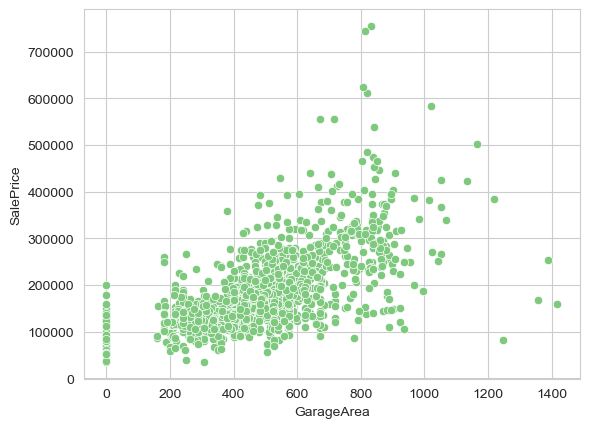

In [167]:
sns.scatterplot(df, x='GarageArea', y='SalePrice')

In [168]:
# remove > 1220
rem_id += list(df.query('GarageArea>1220')['Id'].values)

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

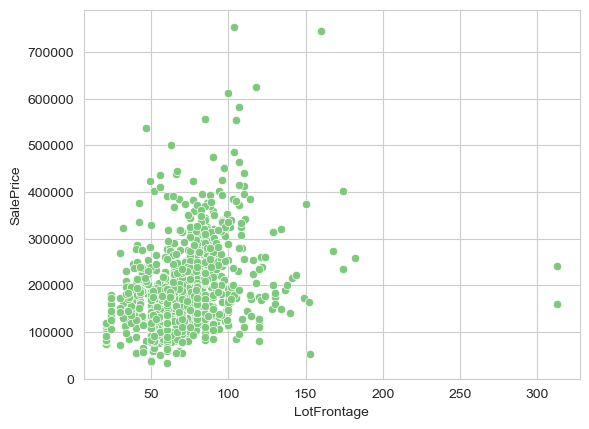

In [169]:
sns.scatterplot(df, x='LotFrontage', y='SalePrice')

In [170]:
# remove > 250
rem_id += list(df.query('LotFrontage>250')['Id'].values)

<Axes: xlabel='OpenPorchSF', ylabel='SalePrice'>

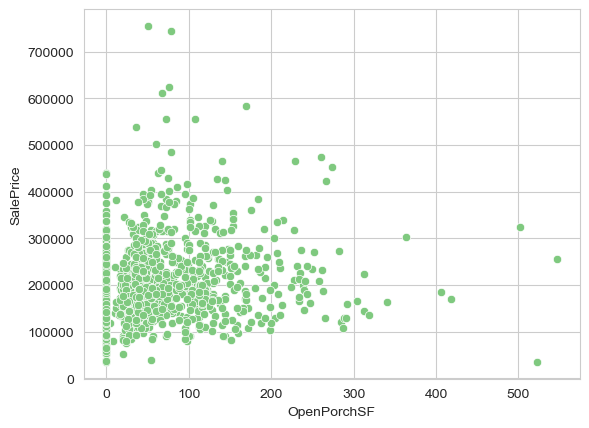

In [171]:
sns.scatterplot(df, x='OpenPorchSF', y='SalePrice')

In [172]:
# remove > 450
rem_id += list(df.query('OpenPorchSF>450')['Id'].values)

<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

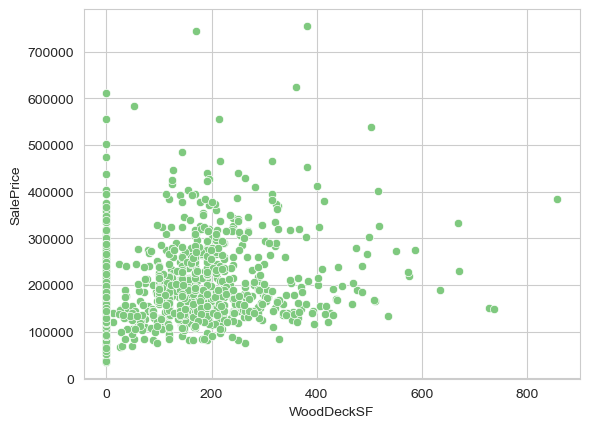

In [173]:
sns.scatterplot(df, x='WoodDeckSF', y='SalePrice')

In [174]:
# remove > 800
rem_id += list(df.query('WoodDeckSF>450')['Id'].values)

In [175]:
rem_id = set(rem_id)
len(rem_id)

35

### try without outliers

In [219]:
tmpdf = df.copy()

In [220]:
tmpdf = tmpdf[~tmpdf['Id'].isin(rem_id)]

In [221]:
tmpdf = df.copy()
tmpdf = fill_miss(tmpdf)
tmpdf = feat_eng(tmpdf)
tmpdf = norm_num_col(tmpdf)
tmpdf = transf_cat(tmpdf, cat_cols_oh, cat_col_tdrop)

df_fm = tmpdf.copy()


In [222]:
dtype = df_fm.dtypes
c_dtype = dtype[dtype=='object']
cat_cols = list(c_dtype.index)
for c in ['MoSold', 'YrSold']:#, 'OverallQual', 'OverallCond']:
    cat_cols.append(c)

cat_features = [df_fm.columns.get_loc(col)-1 for col in cat_cols] # -1 because we will drop Id column

c_dtype = df_fm.dtypes
# we need to convert our categorical feature to numerical
for c in c_dtype[c_dtype=='object'].index:
    df_fm[c] = df_fm[c].astype('category').cat.codes

label = df_fm['SalePrice']
df_fm.drop(['Id', 'SalePrice'], axis=1, inplace=True)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(df_fm, np.log1p(label), test_size=0.25, random_state=r_st)

In [224]:
# Create an instance of the LightGBM Regressor with the RMSE metric.
model_lgb = LGBMRegressor(**hyper_params)
 
# Train the model using the training data.
model_lgb.fit(X_train, y_train, categorical_feature=cat_features)

[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero


LGBMRegressor(bagging_fraction=0.7, bagging_freq=9, feature_fraction=0.9,
              learning_rate=0.05, max_bin=512, max_depth=9, metric='rmse',
              n_estimators=250, num_iterations=1000, num_leaves=200,
              task='train', verbose=-1)

In [225]:

pred_lgb = model_lgb.predict(X_test)

rmse = (np.sqrt(mean_squared_error(y_test, pred_lgb)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.5f}'.format(rmse))
print('R2: {:.5f}'.format(r2))

Testing performance
RMSE: 0.12935
R2: 0.90338


<Axes: >

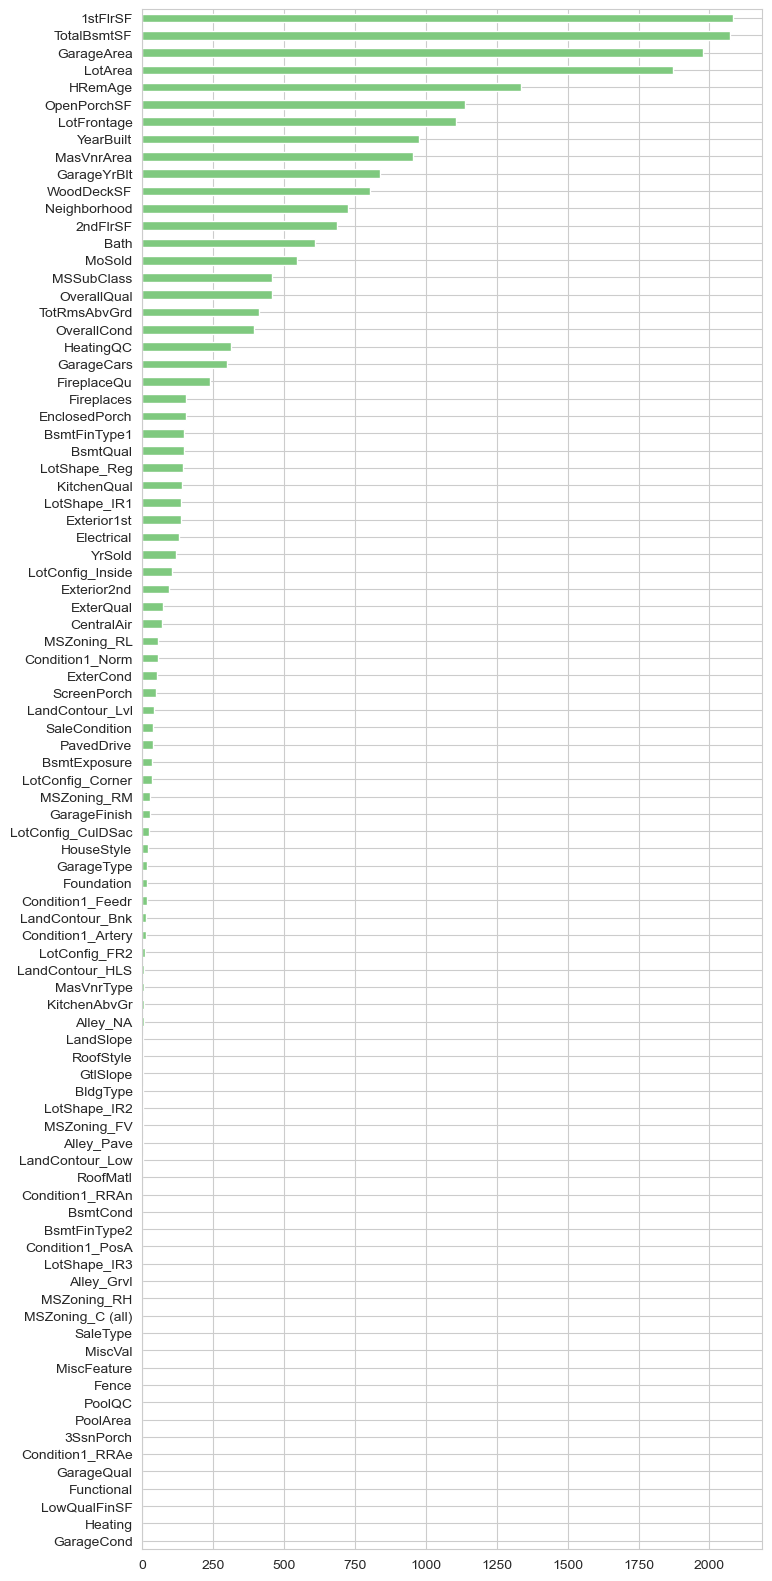

In [226]:
feat_imp = pd.Series(model_lgb.feature_importances_, index=df_fm.columns)
feat_imp.sort_values(ascending=True).plot(kind='barh', figsize=(8,20))

### test data

In [227]:
test_data = pd.read_csv('test.csv')

t_id = test_data['Id']
test_data.drop('Id', axis=1, inplace=True)

test_data = fill_miss(test_data)
test_data = feat_eng(test_data)
test_data = norm_num_col(test_data)
test_data = transf_cat(test_data, cat_cols_oh, cat_col_tdrop)

dtype = test_data.dtypes
c_dtype = dtype[dtype=='object']
for c in c_dtype[c_dtype=='object'].index:
    test_data[c] = test_data[c].astype('category').cat.codes

In [228]:
y_tpred_lgb = model_lgb.predict(test_data)

# create submission file
subm = pd.DataFrame()
subm['Id'] = t_id
subm['SalePrice'] = np.expm1(y_tpred_lgb)
subm.set_index('Id').to_csv('submission_lgb_no.csv')

### CatBoost

In [186]:
train_dataset = cb.Pool(X_train, y_train)#, cat_features=cat_features) 
test_dataset = cb.Pool(X_test, y_test)#, cat_features=cat_features)

model_CBR2 = cb.CatBoostRegressor(loss_function='RMSE',
                             depth=4,
                             learning_rate = 0.1,
                             iterations=150,
                             l2_leaf_reg=0.2,
                             verbose=False)

# model_CBR2 = cb.CatBoostRegressor(loss_function='RMSE',
#                             verbose=False)

# grid = {'iterations': [100, 150, 200],
#         'learning_rate': [0.03, 0.1, 0.5],
#         'depth': [2, 4, 6, 8],
#         'l2_leaf_reg': [0.2, 0.5, 1, 3]}

# model_CBR2.grid_search(grid, train_dataset)

In [187]:
model_CBR2.fit(train_dataset)
pred_cbr = model_CBR2.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred_cbr)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.5f}'.format(rmse))
print('R2: {:.5f}'.format(r2))

Testing performance
RMSE: 0.12319
R2: 0.91236


In [189]:
np.corrcoef(pred_lgb, pred_cbr)

array([[1.        , 0.98364505],
       [0.98364505, 1.        ]])

In [ ]:
test_data = pd.read_csv('test.csv')

t_id = test_data['Id']
test_data.drop('Id', axis=1, inplace=True)

test_data = fill_miss(test_data)
test_data = feat_eng(test_data)
test_data = norm_num_col(test_data)
test_data = transf_cat(test_data)

dtype = test_data.dtypes
c_dtype = dtype[dtype=='object']
for c in c_dtype[c_dtype=='object'].index:
    test_data[c] = test_data[c].astype('category').cat.codes

In [ ]:
y_tpred_CBR = model_CBR2.predict(test_data)

# create submission file
subm = pd.DataFrame()
subm['Id'] = t_id
subm['SalePrice'] = np.expm1(y_tpred_CBR)
subm.set_index('Id').to_csv('submission_cbr_f.csv')